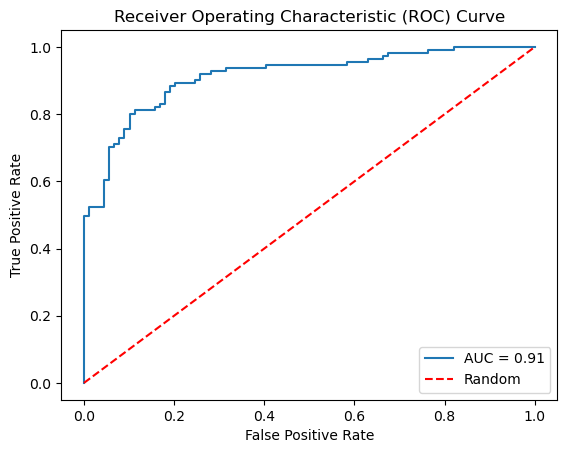

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import random
import os

import pandas_profiling

# Graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, KBinsDiscretizer
# compose
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline


from sklearn.utils import resample

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingRegressor, RandomForestRegressor

import xgboost

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import calinski_harabasz_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from tensorflow import keras
import tensorflow as tf

from scipy import stats
import scipy.stats as stats
from scipy.stats import uniform, randint
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import shapiro, wilcoxon
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import skew, kurtosis
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.sandbox.stats.runs import runstest_1samp

# arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from pmdarima import auto_arima

# association
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
# import pinguin as pg

# step 
from dmba import stepwise_selection, forward_selection, backward_elimination
from dmba import AIC_score

# not required
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.datasets import load_breast_cancer

from six import StringIO # just for mglearn

import warnings

2023-11-03 06:58:10.749015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


no display found. Using non-interactive Agg backend


In [3]:
warnings.filterwarnings('ignore')

In [23]:
plt.rc('font', family='AppleGothic')
# plt.rc('font', family='Malgun Gothic')
# font = {'family' : 'Malgun Gothic',
#         'weight' : 'bold',
#         'size'   : 20}

# plt.rc('font', **font)  
mpl.rcParams['axes.unicode_minus'] = False
# %matplotlib notebook
%matplotlib inline   

In [5]:
# 모든 행/렬 출력

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# 1. Load data area

In [12]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
telco = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
state = pd.read_csv('./data/state.csv')

In [13]:
telco_data = telco
wine_data = wine
iris = load_iris()

In [14]:
iris_data = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_data['target'] = iris.target
iris_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [15]:
wine_data.rename({'class' : 'target'})

alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]

In [16]:
data = iris_data
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

In [10]:
np.bincount(data.target)

array([50, 50, 50])

In [11]:
data.shape

(150, 5)

# 2. EDA(탐색적 데이터 분석)
- 투키의 1977년 Exploratory Data Analysis(탐색적 데이터 분석)을 통해 정립
- 요약통계량(평균, 중앙값, 분위수)와 함께 데이터 집합을 그림으로 표현되는 간단한 도표 제시

In [17]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [18]:
data.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [20]:
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

# Visualization
- 특잇값을 찾아내거나, 데이터 변형이 필요한지 알아보거나, 모델에 대한 아이디어를 찾기 위한 과정의 일부이다

# Matplot

pyplot.subplots 옵션

|인자|설명|
|:--|:--|
|nrows|서브플롯의 로우 수|
|ncols|서브플롯의 컬럼 수|
|sharex|모든 서브플롯이 같은 x축 눈금을 사용하도록 한다(xlim 값을 조절하면 모든 서브플롯에 적용)|
|sharey|모든 서브플롯이 같은 y축 눈금을 사용하도록 한다(xlim 값을 조절하면 모든 서브플롯에 적용)|
|subplot_kw|add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전|
|**fig_kw|figure를 생성할 때 사용할 추가적인 키워드 인자. 예를 들면 plt.subplot(2,2, figsize=(8,6))

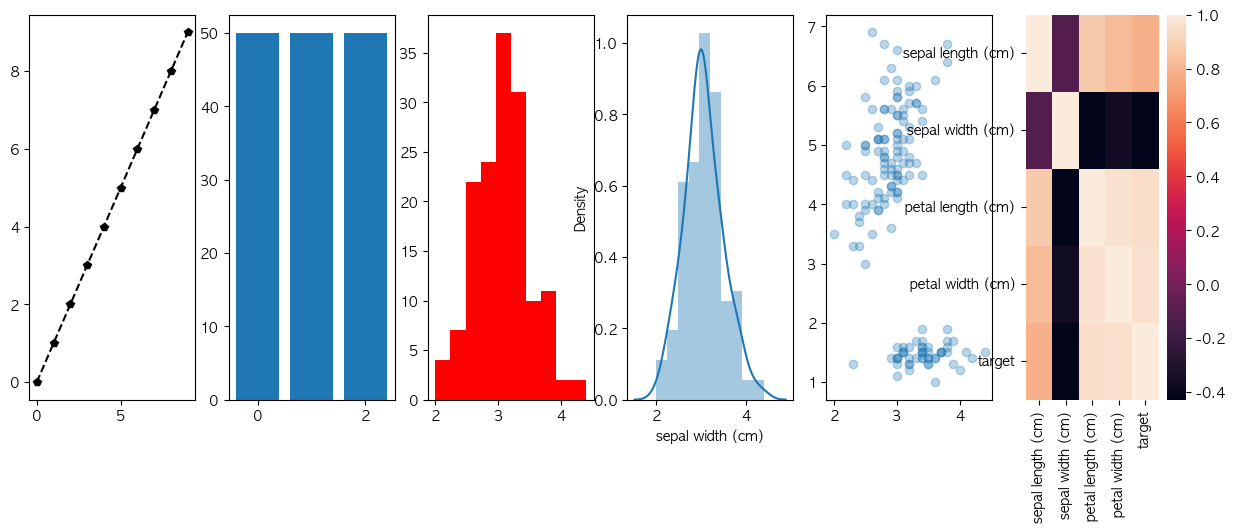

In [24]:
fig, axs = plt.subplots(1,6, figsize = (15, 5))
axs[0].plot(range(10), 'pk--')
axs[1].bar(data.target.value_counts().index, data.target.value_counts())
axs[2].hist(data.iloc[:,1], bins=10, color='red')
sns.distplot(data.iloc[:,1], bins=10, ax=axs[3])
axs[4].scatter(data.iloc[:,1], data.iloc[:,2], alpha=0.3)
sns.heatmap(data.corr(), ax=axs[5])
plt.show()

# Lineplot

Series.plot 메서드 인자

|인자|설명|
|:--|:--|
|label|그래프의 범례 이름|
|ax| 그래프를 그릴 matplotlib의 서브플롯 객체. 만약 아무것도 넘어오지 않으면 현재 활성화되어 있는 matplotlib의 서브플롯을 사용|
|style|matplotlib에 전달할 'ko--'같은 스타일 문자열|
|alpha|그래프 투명도(0부터 1까지)|
|kind|그래프 종류. 'area', 'bar','barh','desity','hist','kde','line',pie'|
|logy|y축에 대한 로그 스케일링|
|use_index|객체의 색인을 눈금 이름으로 사용할지 여부|
|rot|눈금 이름을 로테이션(0부터 360까지)
|xticks|x축으로 사용할 값|
|yticks|y축으로 사용할 값|
|xlim|x축 한계(예: [0, 10])
|ylim|y축 한계|
|grid|축의 그리드를 표시할지 여부|


DataFrame의 plot 메서드 인자

|인자|설명|
|:--|:--|
|subplots|각 DataFrame의 컬럼을 독립된 서브플롯에 그린다|
|sharex|subplots=True인 경우 같은 x축을 공유하고 눈금과 한계를 연결한다|
|sharey|subplots=True인 경우 같은 y축을 공유|
|figsize|생성될 그래프의 크기를 튜플로 지정|
|title|그래프의 제목을 문자열로 지정|
|legend|서브플롯의 범례를 추가한다(기본값은 True)|
|sort_columns|컬럼을 알파벳 순서로 그린다. 기본값은 존재하는 컬럼 순서|

<Axes: >

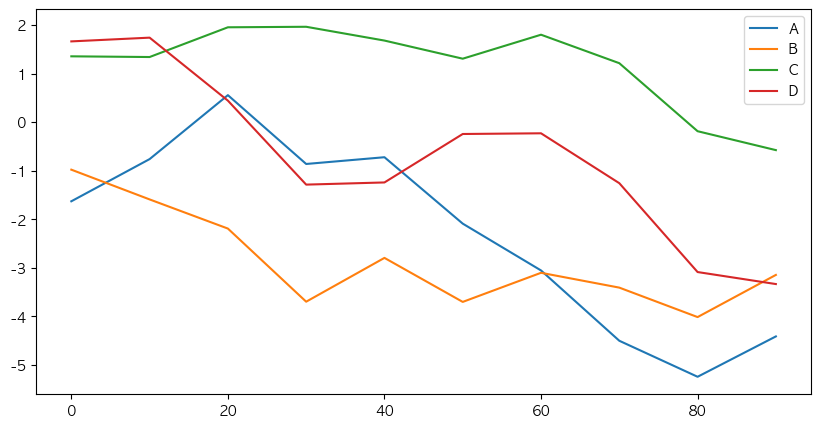

In [25]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))

df.plot(figsize=(10,5)) # # plt.rc('figure', figsize=(10,5))

## 막대그래프(bar plot)
- 값의 빈도를 그릴 때 사용되며, x값이 범주형 값일 때
- stacked 옵션을 통해 누적 막대 그래프 그릴 수 있다

<Axes: >

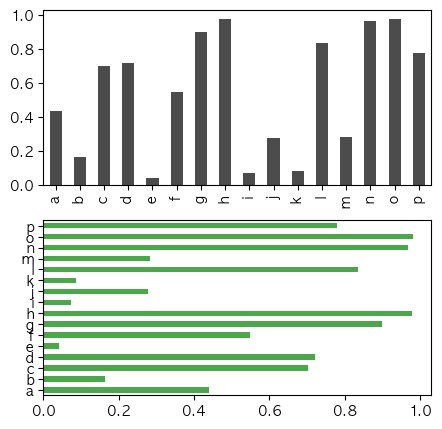

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(5,5))
datas = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
datas.plot.bar(ax=axes[0], color='k', alpha=0.7)
datas.plot.barh(ax=axes[1], color='g', alpha=0.7)


# 도수분포표와 히스토그램
- 변수의 범위를 동일한 크기의 구간으로 나눈 다음, 각 구간마다 몇 개의 변숫값이 존재하는지를 보여주기 위해 사용
- max - min / n

> 도수분포표와 백분위수 모두 구간을 나눠서 데이터를 살펴보는 접근 방법. 일반적으로 사분위수와 십분위수는 각 구간에 같은 수의 데이터가 포함되도록, 즉 서로 크기가 다르게 구간을 나누는 것이라 할 수 있으며, 도수분포표는 구간의 크기가 같도록, 즉 구간 안에 다른 개수의 데이터가 오도록 한다고 할 수 있다

In [27]:
binned_population =  pd.cut(state['Population'], 10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [28]:
# qcut의 사분위수와 quantile이 같다
binned_population =  pd.qcut(state['Population'], 4)
binned_population.value_counts()

(563625.999, 1833004.25]    13
(6680312.25, 37253956.0]    13
(1833004.25, 4436369.5]     12
(4436369.5, 6680312.25]     12
Name: Population, dtype: int64

In [29]:
state['Population'].quantile([0.25, 0.5, 0.75])

0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

Text(0.5, 0, 'Population (millions)')

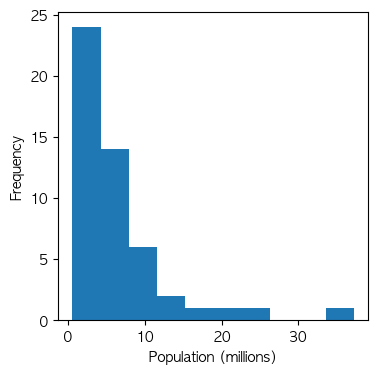

In [30]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

# Scatter plot
- 두 개의 1차언 데이터 묶음 간의 관계를 나타낼 때 유용
- 두 변수 사이의 관계를 시각화하는 가장 기본적인 방법으로, x와 y는 각 변수들을의미하고 그래프의 각 점은 하나의 레코드

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

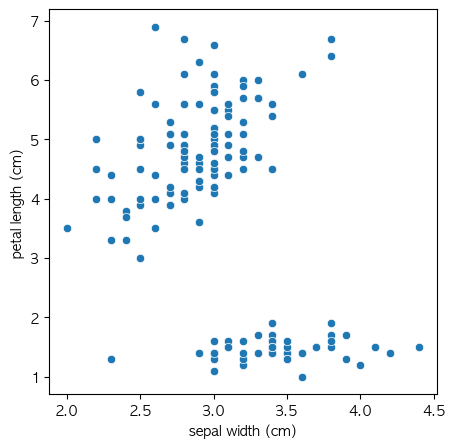

In [31]:
plt.rc('figure', figsize=(5,5))
sns.scatterplot(x = data.iloc[:,1], y= data.iloc[:,2])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

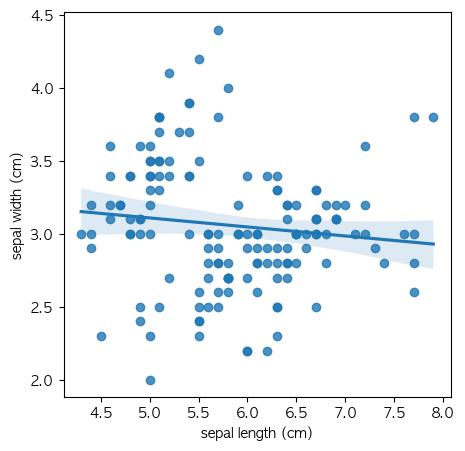

In [32]:
# 선형회귀 곡선과 산포도를 함께 표현
plt.rc('figure', figsize=(5,5))
sns.regplot(data = data, x = 'sepal length (cm)', y = 'sepal width (cm)')

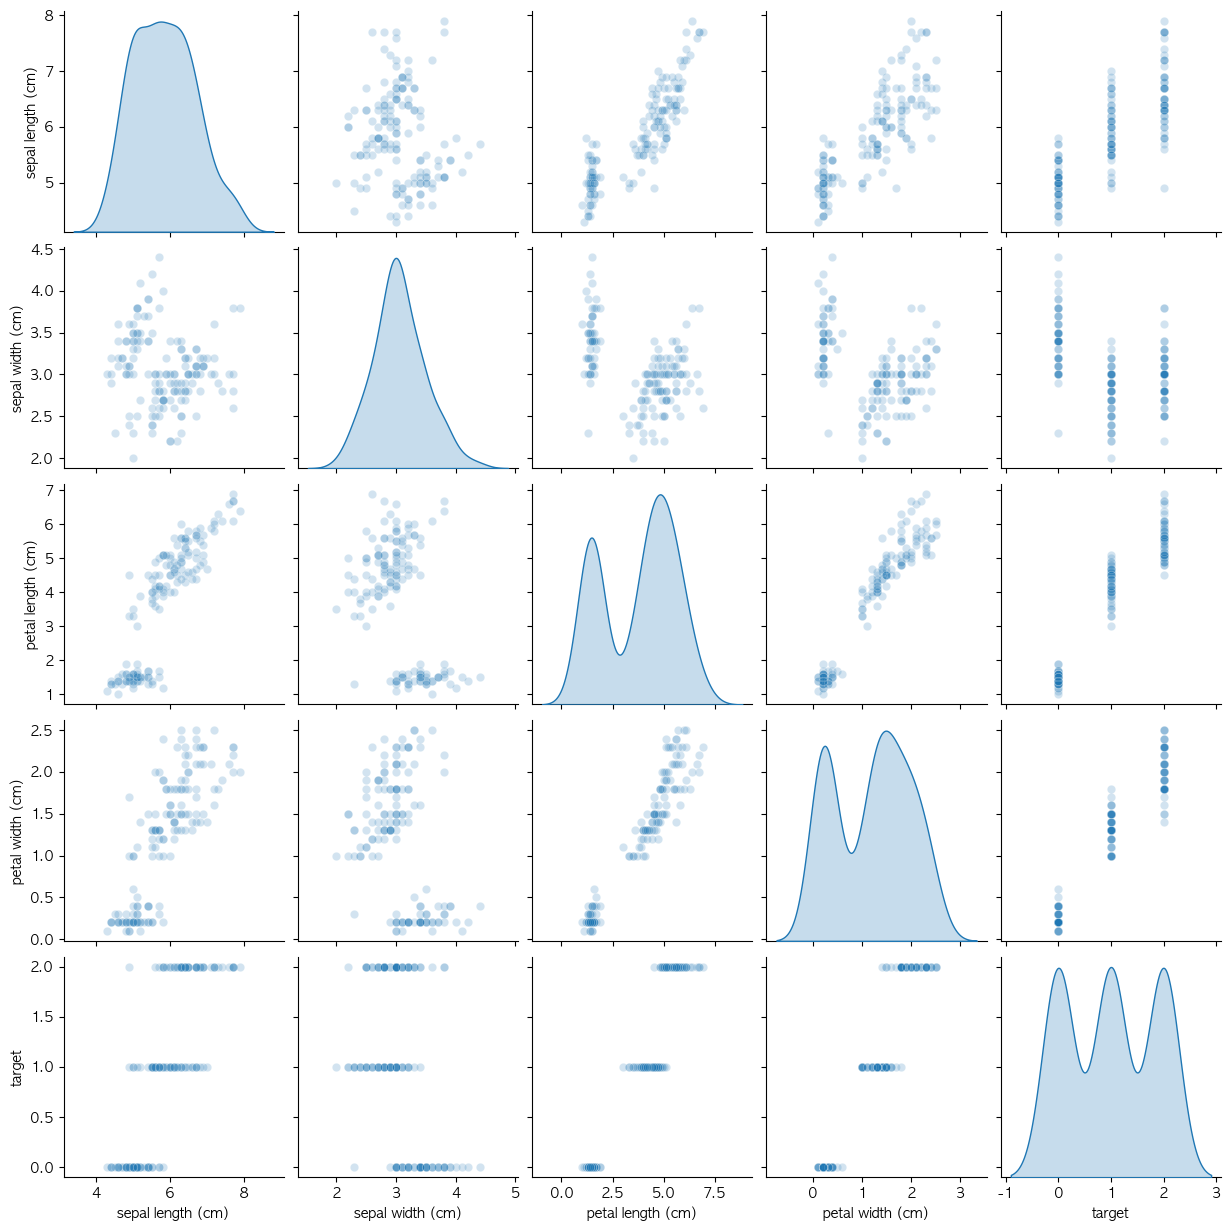

In [33]:
# 산포도 행렬
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha' : 0.2})

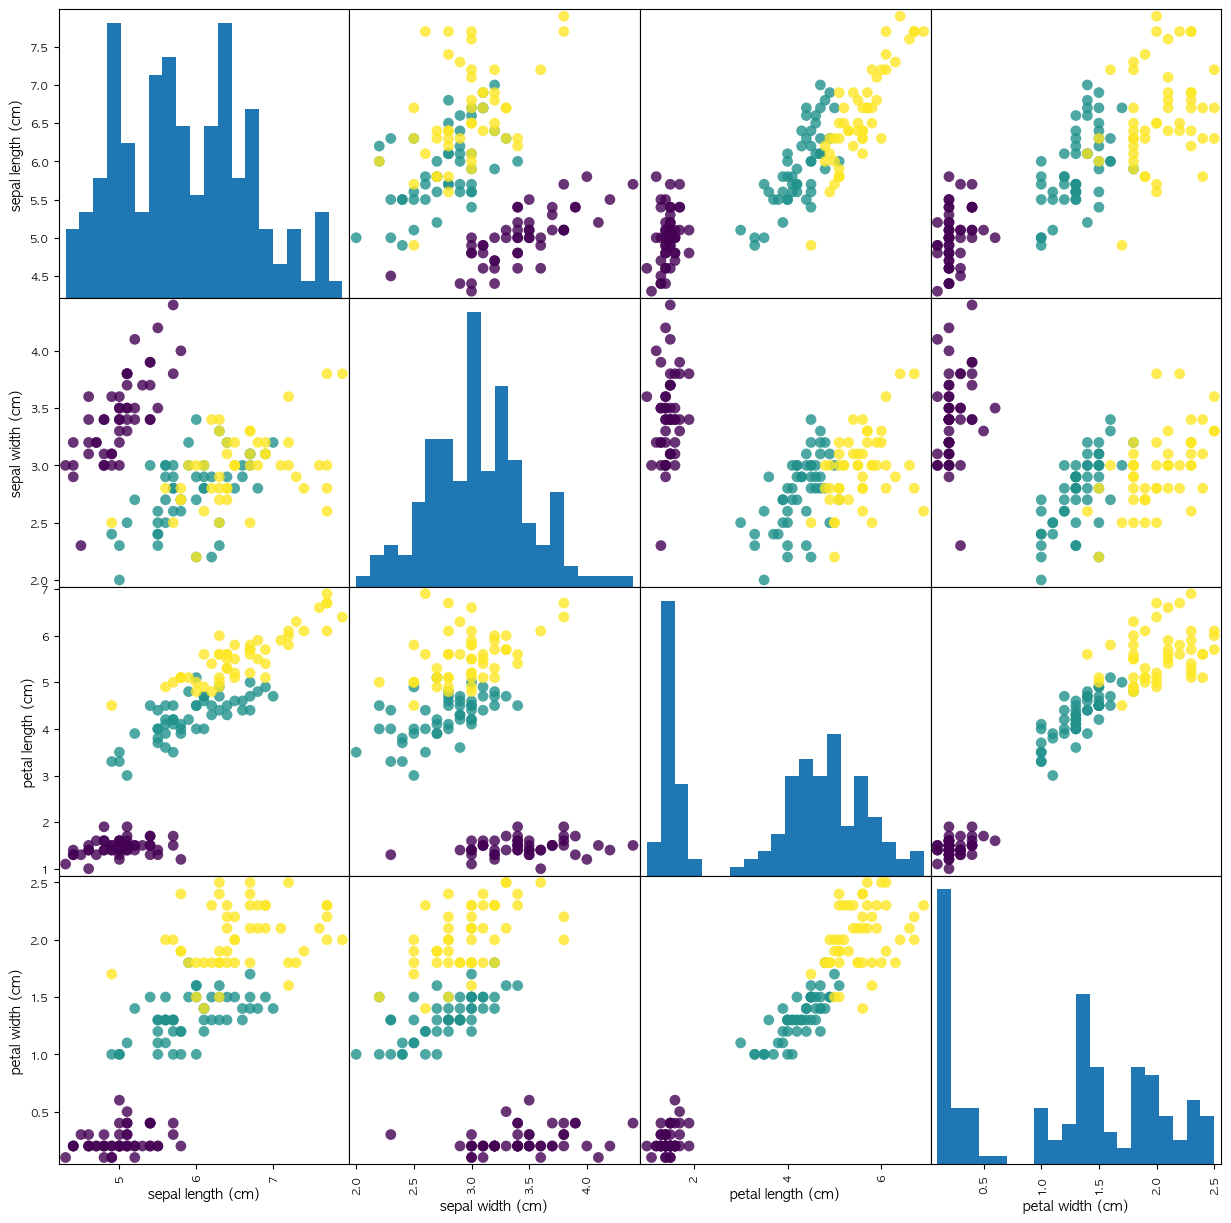

In [35]:
pd.plotting.scatter_matrix(X_data, c=y_data, figsize=(15, 15), marker= 'o', hist_kwds={'bins' : 20}, s= 60, alpha=.8)
plt.show()

# Boxplot
- 중간값과 사분위 특잇값을 보여주는 상자그림
- 박스의 중앙선은 중위값을 나타내며, 박스의 상단은 75%, 하단은 25%이다. 즉 박스는 총 50%를 포함한다. 상자위의 선(Upper fence)은 3사분위(75%) + 1.5 * IQR(3사분위 - 1사분위)값이며, 상자아래의 선(Lower Fence)은 1사분위(25%) + 1.5 * IQR(3사분위 - 1사분위)값이다. 최댓값과 최솟값은 Upper/Lower Fence사이의 값이며, 그 밖은 이상치로 분류 한다

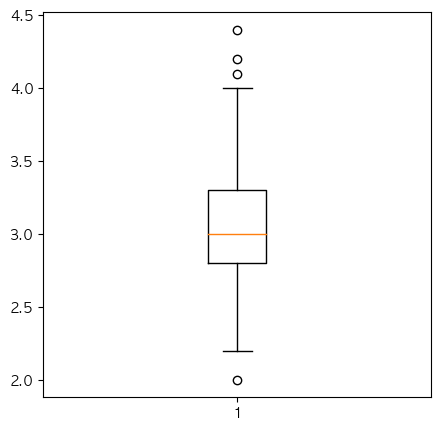

In [36]:
plt.boxplot(data.iloc[:,1])
plt.show()

# Heatmap
- 상관관계 등을 표현할 때 유용

## 패싯 그리드와 범주형 데이터
- 추가적인 그룹 차원을 가지는 데이터 시각화에 유용한 방법

In [37]:
telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

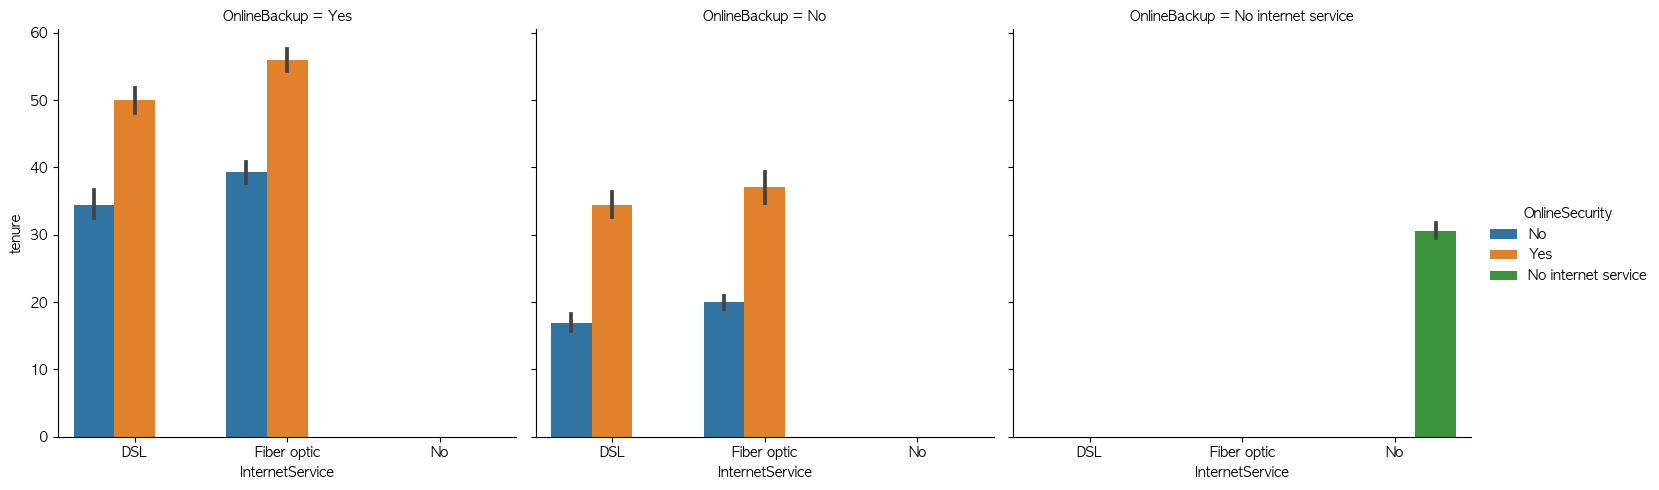

In [38]:
sns.catplot(x='InternetService', y='tenure', hue='OnlineSecurity', col='OnlineBackup', kind='bar', data=telco)
plt.show()

## 바이올린 도표
- 바이올린 도표는 상자그림을 보완한 형태로 y축을 따라 밀도추정 결과를 동시에 시각화한다 

<Axes: title={'center': 'pct_carrier_delay'}, xlabel='airline'>

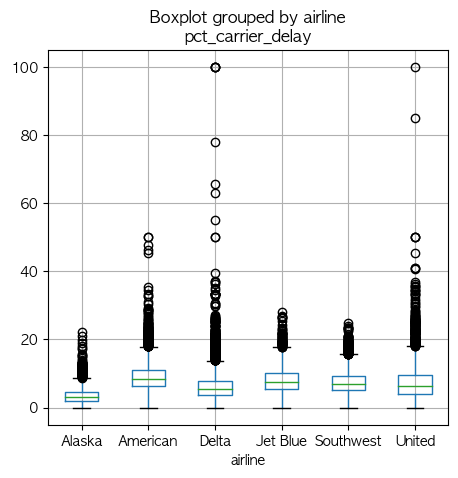

In [39]:
airline_stats = pd.read_csv('./data/airline_stats.csv')
ax = airline_stats
airline_stats.boxplot(by='airline', column='pct_carrier_delay')

Text(0, 0.5, 'Daily delay flight')

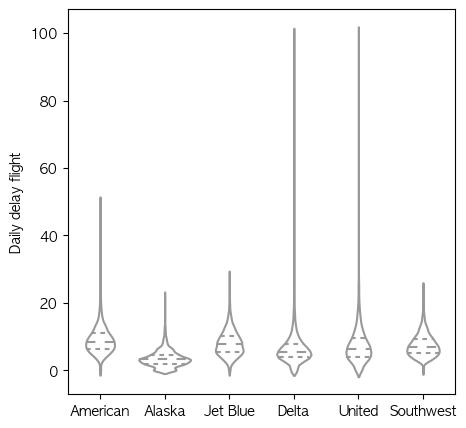

In [40]:
ax = sns.violinplot(x = airline_stats.airline, y=airline_stats.pct_carrier_delay, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily delay flight')

In [41]:
pandas_profiling.ProfileReport(telco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Preprocessing

## 3.1 Preprocessing - Cleaning

## Null 처리
- 결측값이 존재하면 삭제 또는 채울 수 있다. 
- 삭제는 데이터 손실을 발생시킨다. 
- fillna를 통해 결측값을 평균이나, 0 등으로 대체 할 수 있다

|param|Description|
|--|--|
|axis|0또는 index이면 결측값이 포함된 행을 삭제, 1또는 columns면 결측값이 포함된 열을 삭제|
|thresh|정숫값을 지정하면 결측값이 아닌 값이 그보다 많을 때 행 또는 열을 유지|
|subset|어떤 레이블에 결측값이 존재하면 삭제할지 결정|
|inplace|True면 제자리에서 작업 수행하고 None을 반환|


In [42]:
health = pd.DataFrame({'연도':[2017, 2018, 2019, 2020, 2021, 2022, 2017, 2017, 2021],
                      '키' : [180, 190, 180, 177, 178, None, None, 183, 199],
                      '몸무게' : [80, None, 80, 77, 78, 83, 85, None, 99],
                      '시력' : [1.2, None, 1.2, 1.1, 1.8, 1.9, 2.2, 7.0, 7.7],
                       '병결' : [None, None, None, 2, 7, 1, None, None, 77]})

In [43]:
health.isna().sum()

연도     0
키      2
몸무게    2
시력     1
병결     5
dtype: int64

In [44]:
health

연도      키   몸무게   시력    병결
0  2017  180.0  80.0  1.2   NaN
1  2018  190.0   NaN  NaN   NaN
2  2019  180.0  80.0  1.2   NaN
3  2020  177.0  77.0  1.1   2.0
4  2021  178.0  78.0  1.8   7.0
5  2022    NaN  83.0  1.9   1.0
6  2017    NaN  85.0  2.2   NaN
7  2017  183.0   NaN  7.0   NaN
8  2021  199.0  99.0  7.7  77.0

In [45]:
health.dropna(subset=['병결'])

연도      키   몸무게   시력    병결
3  2020  177.0  77.0  1.1   2.0
4  2021  178.0  78.0  1.8   7.0
5  2022    NaN  83.0  1.9   1.0
8  2021  199.0  99.0  7.7  77.0

In [47]:
health.fillna(health.mean()) # 각 평균으로 대치
health.fillna(method='ffill') # 이전값으로 대치

연도      키   몸무게   시력    병결
0  2017  180.0  80.0  1.2   NaN
1  2018  190.0  80.0  1.2   NaN
2  2019  180.0  80.0  1.2   NaN
3  2020  177.0  77.0  1.1   2.0
4  2021  178.0  78.0  1.8   7.0
5  2022  178.0  83.0  1.9   1.0
6  2017  178.0  85.0  2.2   1.0
7  2017  183.0  85.0  7.0   1.0
8  2021  199.0  99.0  7.7  77.0

In [49]:
health.groupby('연도').transform(lambda x: x.fillna(x.mean()))

키   몸무게   시력    병결
0  180.0  80.0  1.2   NaN
1  190.0   NaN  NaN   NaN
2  180.0  80.0  1.2   NaN
3  177.0  77.0  1.1   2.0
4  178.0  78.0  1.8   7.0
5    NaN  83.0  1.9   1.0
6  181.5  85.0  2.2   NaN
7  183.0  82.5  7.0   NaN
8  199.0  99.0  7.7  77.0

In [50]:
health.groupby('연도')['키'].transform('cumsum')

0    180.0
1    190.0
2    180.0
3    177.0
4    178.0
5      NaN
6      NaN
7    363.0
8    377.0
Name: 키, dtype: float64

## 중복값 제거

In [51]:
telco.drop_duplicates(inplace=True)

## 이상치 처리
- 상자그림을 그려서 확인 (Q1 - 1.5 IQR and Q3 + 1.5 IQR)

# 데이터 요약
- applymap()은 각 요소에 대해 작업하는데 사용되며, apply()는 행 또는 열에 대해 작업 하는데 사용 된다

## 그룹화

## 집계

### 도수분포표

In [52]:
telco.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [53]:
telco.loc[telco.TotalCharges == '6201.95']
telco.iloc[487:489]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
487  3649-JPUGY    Male              0      No         No      72   
488  4472-LVYGI  Female              0     Yes        Yes       0   

    PhoneService     MultipleLines InternetService OnlineSecurity  \
487          Yes               Yes             DSL             No   
488           No  No phone service             DSL            Yes   

    OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
487          Yes              Yes         Yes         Yes             Yes   
488           No              Yes         Yes         Yes              No   

     Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
487  Two year              Yes  Bank transfer (automatic)           88.60   
488  Two year              Yes  Bank transfer (automatic)           52.55   

    TotalCharges Churn  
487      6201.95    No  
488                 No

In [54]:
telco = telco.drop(index = telco.loc[telco.TotalCharges == ' '].index)

In [55]:
telco.TotalCharges = telco.TotalCharges.astype('float')

In [56]:
pd.qcut(telco.TotalCharges, 4).value_counts()

(18.799, 401.45]        1758
(401.45, 1397.475]      1758
(1397.475, 3794.738]    1758
(3794.738, 8684.8]      1758
Name: TotalCharges, dtype: int64

In [57]:
pd.cut(telco.TotalCharges, 4).value_counts()

(10.134, 2185.3]    4305
(2185.3, 4351.8]    1265
(4351.8, 6518.3]     970
(6518.3, 8684.8]     492
Name: TotalCharges, dtype: int64

In [58]:
telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [59]:
pd.crosstab(index=telco.gender, columns=telco.PhoneService)

PhoneService   No   Yes
gender                 
Female        329  3154
Male          351  3198

In [60]:
telco.pivot_table(index='gender', columns='PhoneService')

MonthlyCharges            SeniorCitizen           TotalCharges  \
PhoneService             No        Yes            No       Yes           No   
gender                                                                        
Female            42.224012  67.615060      0.136778  0.165821  1467.960182   
Male              41.775499  66.869356      0.168091  0.161038  1530.871937   

                              tenure             
PhoneService          Yes         No        Yes  
gender                                           
Female        2368.229328  30.741641  32.452441  
Male          2366.003268  32.851852  32.517198

In [61]:
telco.pivot(index='customerID', columns='PhoneService', values='MonthlyCharges')

PhoneService    No    Yes
customerID               
0002-ORFBO     NaN  65.60
0003-MKNFE     NaN  59.90
0004-TLHLJ     NaN  73.90
0011-IGKFF     NaN  98.00
0013-EXCHZ     NaN  83.90
...            ...    ...
9987-LUTYD     NaN  55.15
9992-RRAMN     NaN  85.10
9992-UJOEL     NaN  50.30
9993-LHIEB     NaN  67.85
9995-HOTOH    59.0    NaN

[7032 rows x 2 columns]

## 3.2 데이터 분할

### 3.2.1 홀드아웃 검증

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)

## 3.3. Preprocessing

## 수치형 데이터
- StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지 한다. (최댓값과 최솟값 크기 제한 하지 않는다)
- RobustScaler : 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 유사하나, 평균과 분산대신 중값 값과 사분위 값을 사용한다. 이런 방식 때문에 전체 데이터와 아주 동떨어진 데이터에 영향을 받지 않는다.
- MinMaxScler : 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경. 2차원 데이터셋일 경우 모든 데이터가 x축의 0과 1, y축의 0과 1사이에 위치한다
- Normalizer : 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정. 특성 벡터의 길이는 상관 없고 데이터 방향(각도)만이 중요할 때 많이 사용
- QuantileTransformer : 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포. RobustScaler과 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축
- PowerTransformer :정규 분포로 분포 변환 

### MinMaxScaler (정규화)
- 최댓값과 최솟값을 통해 값을 1~0범위로 변환
* 전체 데이터 프레임에 적용해도, 각 컬럼별로 Min Max 계산

$ \frac{X - X_{min}}{X_{max} - X_{min}}$

In [66]:
from sklearn.datasets import load_breast_cancer

In [68]:
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-1], cancer_df.iloc[:,-1])

In [79]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
svc = SVC()

In [81]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9090909090909091

In [82]:
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.986013986013986

### StandardScaler (표준화)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc = SVC(C=100)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9370629370629371

### QuantileTransformer

In [47]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

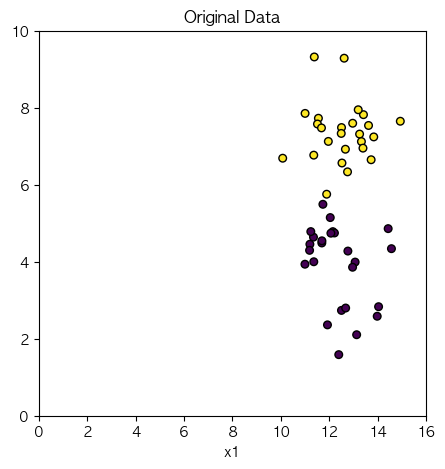

In [48]:
plt.scatter(X[:, 0],X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.xlabel('x1')
plt.title('Original Data')
plt.show()

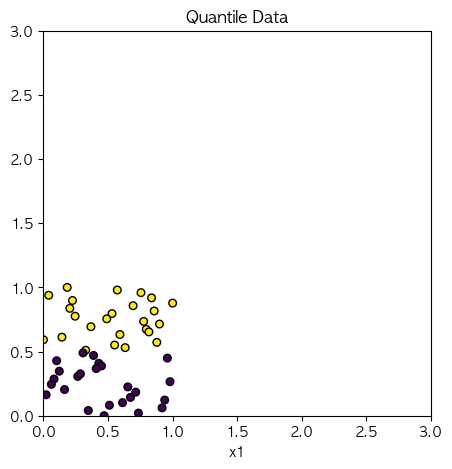

In [49]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0],X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 3)
plt.xlabel('x0')
plt.ylim(0, 3)
plt.xlabel('x1')
plt.title('Quantile Data')
plt.show()

[]

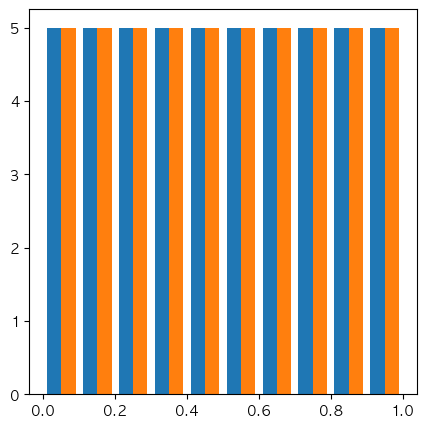

In [50]:
plt.hist(X_trans)
plt.plot()

In [51]:
X[:,0]

array([12.1438515 , 11.8888119 , 11.34468785, 11.92229526, 10.99313649,
       11.19679821, 14.563957  , 12.5211582 , 12.66300069, 13.61787476,
       13.06393839, 12.61215674, 11.35656532, 11.37839711, 12.50048972,
       12.76566918, 11.68937095, 11.35760513, 13.12719906, 12.03763281,
       12.20989214, 13.24892115, 11.69289001, 12.96346605, 14.93027136,
       12.50229021, 12.06439343, 13.8336073 , 11.54824906, 12.75082841,
       11.23501274, 13.4083858 , 14.42846765, 11.18378052, 13.32452898,
       13.72550582, 11.5093186 , 12.67284681, 12.95926647, 13.97634432,
       12.49123469, 11.95786868, 11.7337095 , 11.67494727, 12.38860303,
       13.38833726, 10.07391193, 10.99815287, 13.19193431, 14.0329545 ])

In [52]:
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [53]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans, [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


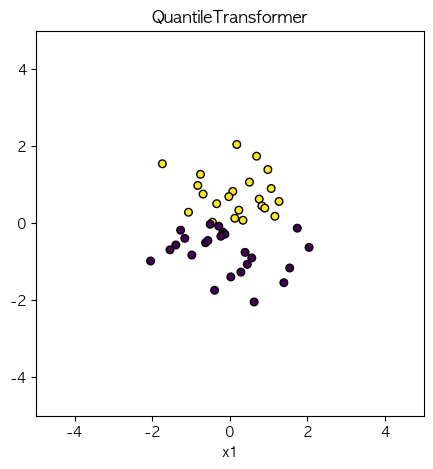

In [54]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0],X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.xlabel('x1')
plt.title(type(scaler).__name__)
plt.show()

Text(0.5, 1.0, 'Power Trans yeo-johnson')

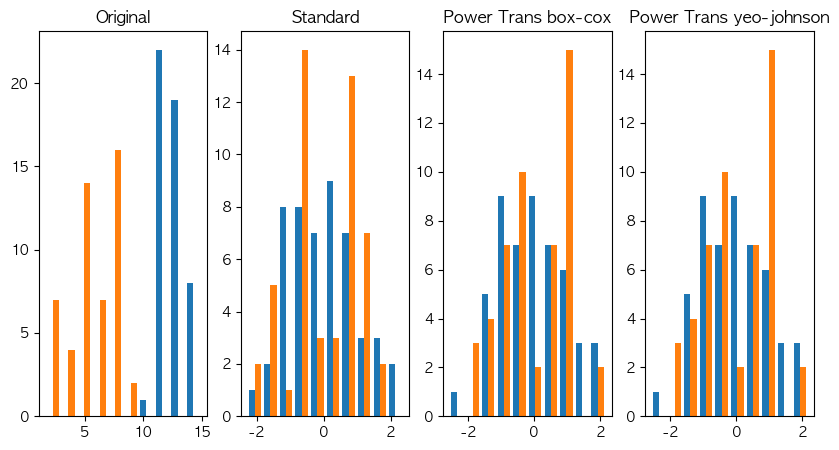

In [55]:
fig, axes = plt.subplots(1,4,figsize = (10, 5))

axes[0].set_title('Original')
axes[0].hist(X)

X_trans = StandardScaler().fit_transform(X)
axes[1].set_title('Standard')
axes[1].hist(X_trans)

X_trans = PowerTransformer(method='box-cox').fit_transform(X)

axes[2].hist(X_trans)
axes[2].set_title('Power Trans box-cox')


X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
axes[3].hist(X_trans)
plt.title('Power Trans yeo-johnson')


## 범주형 데이터

### Label Encoder
- Column transfer에서 feature에 사용하면 에러 발생 -> Oridinal Encoder사용해야함. Label encoder는 target을 위해 만들어진..

### Ordinal Encoder
- 데이터 input은 배열 형태로

### OneHot Encoder
- 범주형 value값을, 컬럼으로 하고 0/1로 표현한다. 다중공성선 제거를 위해 drop_first 옵션을 사용
- pandas의 get_dummies사용하면 컬럼명이 유지되나, test 데이터에서 기존에 없던 value가 발생시 문제가 된다. 그럴 땐 sklearn의 onehotencoder 사용
* pandas get_dummies를 데이터프레임 전체에 사용하면 자동으로 obejct 컬럼에 대해서만 onehot 수행되며, 필요 시 컬럼에 명시해야한다

In [106]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

In [107]:
iris_data['target'] = iris_data.target.map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
iris_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [120]:
iris_data.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [125]:
od = LabelEncoder()
od.fit_transform(iris_data.target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
iris_dummy = pd.get_dummies(iris_data)
iris_dummy

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target_setosa  target_versicolor  target_virginica  
0                1                  0                 0  
1                1                  0                 0  
2                1                  0                 0  
3                1                  0                 0  
4                1                  0                 0  
..             ...                ...               ...  
145              0                  0                 1  
146              0                  0                 1  
147              0                  0                 1  
148              0                  0                 1  
149              0                  0                 1  

[150 rows x 7 columns]

In [58]:
oh_df = pd.DataFrame({'col1' : range(15), 
                      'col2' : ['a'] * 5 + ['b'] * 5 + ['c'] * 5,
                      'col3' : range(15)})
oh_df_test = pd.DataFrame({'col1' : range(15), 'col2' : ['a'] * 5 + ['b'] * 5 + ['d'] * 2 + ['e'] * 3})

In [59]:
pd.get_dummies(oh_df.iloc[:,:2])

col1  col2_a  col2_b  col2_c
0      0       1       0       0
1      1       1       0       0
2      2       1       0       0
3      3       1       0       0
4      4       1       0       0
..   ...     ...     ...     ...
10    10       0       0       1
11    11       0       0       1
12    12       0       0       1
13    13       0       0       1
14    14       0       0       1

[15 rows x 4 columns]

In [60]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # sparse True 시 arrary 하려면 to_array() 사용
trans_data = ohe.fit_transform(oh_df[['col2']])

In [61]:
oh_df.join(pd.DataFrame(trans_data))

col1 col2  col3    0    1    2
0      0    a     0  1.0  0.0  0.0
1      1    a     1  1.0  0.0  0.0
2      2    a     2  1.0  0.0  0.0
3      3    a     3  1.0  0.0  0.0
4      4    a     4  1.0  0.0  0.0
..   ...  ...   ...  ...  ...  ...
10    10    c    10  0.0  0.0  1.0
11    11    c    11  0.0  0.0  1.0
12    12    c    12  0.0  0.0  1.0
13    13    c    13  0.0  0.0  1.0
14    14    c    14  0.0  0.0  1.0

[15 rows x 6 columns]

In [62]:
ohe.transform(oh_df_test[['col2']])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [63]:
ct = ColumnTransformer(
[
    ("oh", OneHotEncoder(), ['col2']),
    ("mx", MinMaxScaler(), ['col1', 'col3'])
]
)

In [64]:
ct.fit_transform(oh_df)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.07142857, 0.07142857],
       [1.        , 0.        , 0.        , 0.14285714, 0.14285714],
       [1.        , 0.        , 0.        , 0.21428571, 0.21428571],
       [1.        , 0.        , 0.        , 0.28571429, 0.28571429],
       [0.        , 1.        , 0.        , 0.35714286, 0.35714286],
       [0.        , 1.        , 0.        , 0.42857143, 0.42857143],
       [0.        , 1.        , 0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        , 0.57142857, 0.57142857],
       [0.        , 1.        , 0.        , 0.64285714, 0.64285714],
       [0.        , 0.        , 1.        , 0.71428571, 0.71428571],
       [0.        , 0.        , 1.        , 0.78571429, 0.78571429],
       [0.        , 0.        , 1.        , 0.85714286, 0.85714286],
       [0.        , 0.        , 1.        , 0.92857143, 0.92857143],
       [0.        , 0.        , 1.

In [65]:
test_df = pd.DataFrame([['양말', 0, 0.1],['여우', 1, 0.2], ['양말', 2, 0.7], ['상자', 1, 0.9], ['행운', 7, 0.7]], 
                       columns=['범주형특성', '숫자형특성', '연속형숫자특성'])

In [66]:
pd.get_dummies(test_df, drop_first=True)

숫자형특성  연속형숫자특성  범주형특성_양말  범주형특성_여우  범주형특성_행운
0      0      0.1         1         0         0
1      1      0.2         0         1         0
2      2      0.7         1         0         0
3      1      0.9         0         0         0
4      7      0.7         0         0         1

In [67]:
oh = OneHotEncoder(sparse=False).fit(test_df)
tran_data = oh.transform(test_df)
tran_data

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]])

In [68]:
oh.categories_, oh.get_feature_names()

([array(['상자', '양말', '여우', '행운'], dtype=object),
  array([0, 1, 2, 7]),
  array([0.1, 0.2, 0.7, 0.9])],
 array(['x0_상자', 'x0_양말', 'x0_여우', 'x0_행운', 'x1_0', 'x1_1', 'x1_2', 'x1_7',
        'x2_0.1', 'x2_0.2', 'x2_0.7', 'x2_0.9'], dtype=object))

In [69]:
oe = OrdinalEncoder().fit(test_df)
tran_data = oe.transform(test_df)
tran_data

array([[1., 0., 0.],
       [2., 1., 1.],
       [1., 2., 2.],
       [0., 1., 3.],
       [3., 3., 2.]])

In [70]:
oe.categories_

[array(['상자', '양말', '여우', '행운'], dtype=object),
 array([0, 1, 2, 7]),
 array([0.1, 0.2, 0.7, 0.9])]

In [71]:
ss_features = ['연속형숫자특성']
ss_transformer = Pipeline(steps=[
    ('scalere', StandardScaler())
])

oh_features = ['범주형특성']
oh_transformer = Pipeline(steps=[
    ('onehote', OneHotEncoder())
])

ord_features = ['숫자형특성']
ord_transformer = Pipeline(steps=[
    ('orde', OrdinalEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('std', ss_transformer, ss_features),
#         ('oh', categorical_transformer, oh_features),
        ('ord', oh_transformer, oh_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KMeans(3))
])

model.fit(test_df)
model.predict(test_df)

array([0, 0, 2, 1, 2], dtype=int32)

## KBinsDiscretizer (구간분할)
- 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할 (이산화)
- 구간 분할은 균일한 너비로 하거나 데이터의 분위를 사용할 수 있다
- 기본적으로 KBinsDiscretizer는 구간에 원핫 인코딩을 적용한다. 

In [72]:
sample_df = pd.DataFrame({'col1' : np.arange(10), 'col2' : np.random.randn(10)})

In [73]:
sample_df

col1      col2
0     0  0.543679
1     1  1.463777
2     2  0.508587
3     3 -0.051517
4     4  0.292304
5     5 -0.386389
6     6  0.352916
7     7  0.958938
8     8 -0.640501
9     9  0.673176

In [74]:
kb = KBinsDiscretizer(n_bins=10)

In [75]:
kb.fit(sample_df[['col1']])

KBinsDiscretizer(n_bins=10)

In [76]:
trans_data = kb.transform(sample_df[['col1']])
trans_data.toarray() # KBins 생성 시 encode = onehot-dense로 만들면 밀집 행렬로 생성한다

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## PolynomialFeatures
- 원본 데이터에 상호작용과 다항식을 추가

In [77]:
poly = PolynomialFeatures(degree=2)

In [78]:
poly.fit(sample_df)
poly.transform(sample_df)

array([[ 1.00000000e+00,  0.00000000e+00,  5.43678627e-01,
         0.00000000e+00,  0.00000000e+00,  2.95586450e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.46377698e+00,
         1.00000000e+00,  1.46377698e+00,  2.14264305e+00],
       [ 1.00000000e+00,  2.00000000e+00,  5.08587261e-01,
         4.00000000e+00,  1.01717452e+00,  2.58661003e-01],
       [ 1.00000000e+00,  3.00000000e+00, -5.15174030e-02,
         9.00000000e+00, -1.54552209e-01,  2.65404281e-03],
       [ 1.00000000e+00,  4.00000000e+00,  2.92304360e-01,
         1.60000000e+01,  1.16921744e+00,  8.54418387e-02],
       [ 1.00000000e+00,  5.00000000e+00, -3.86389470e-01,
         2.50000000e+01, -1.93194735e+00,  1.49296823e-01],
       [ 1.00000000e+00,  6.00000000e+00,  3.52916220e-01,
         3.60000000e+01,  2.11749732e+00,  1.24549858e-01],
       [ 1.00000000e+00,  7.00000000e+00,  9.58938220e-01,
         4.90000000e+01,  6.71256754e+00,  9.19562509e-01],
       [ 1.00000000e+00,  8.00000000e+00, -6.405

In [79]:
poly.get_feature_names_out()

array(['1', 'col1', 'col2', 'col1^2', 'col1 col2', 'col2^2'], dtype=object)

## 일변량 비선형 변환
- log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는데 도움을 준다 -> 정규분포형태의 데이터가 되며, 그러한 데이터들이 성능에 도움이 된다. but 트리 모델은 X
- sin과 cos는 주기적인 패턴 데이터를 다룰 때 편리

In [80]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

In [81]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [82]:
np.bincount(X[:, 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1])

Text(0, 0.5, '출현 횟수')

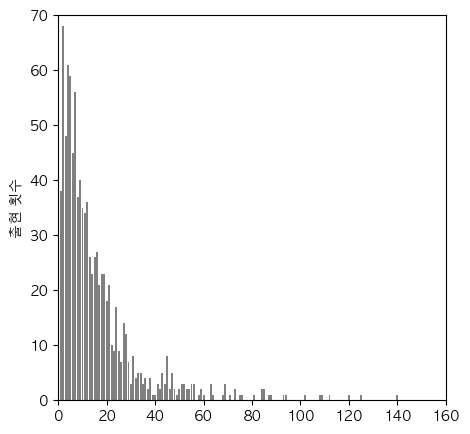

In [83]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
# plt.xlabel('값')

Text(0, 0.5, '출현 횟수')

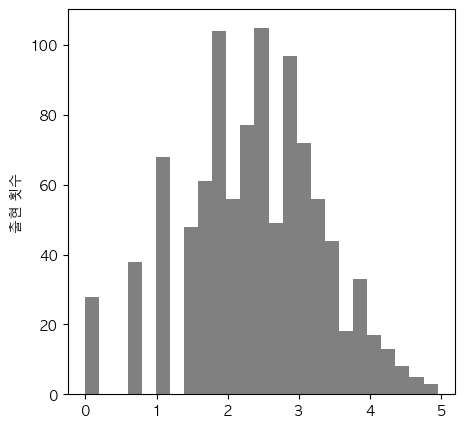

In [84]:
log_data = np.log(X + 1)
plt.hist(log_data[:, 0], bins=25, color='grey')
plt.ylabel('출현 횟수')

### TransactionEncoder
- 연관 분석을 위해 주로 사용 된다.

In [85]:
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

In [86]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

## ColumnTransformer

In [87]:
cars = pd.read_csv('./data/Cars93.csv')

obj_col_list = list()
num_col_list = list()
for i in cars.columns:
    if(cars[i].dtype == 'O'):
        obj_col_list.append(i) # cars.select_dtypes('object').columns
    else:
        num_col_list.append(i) # cars.select_dtypes('number').columns



In [88]:
ct = ColumnTransformer(
[
    ("lb", OrdinalEncoder(), obj_col_list),
    ("sd", StandardScaler(), num_col_list)
])

ct.fit(cars)
cars_trans = ct.transform(cars)

get_feature_name = ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make', 'Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room', 'Weight']

len(ct.feature_names_in_), len(get_feature_name)

(27, 27)

In [89]:
cars_trans_df = pd.DataFrame(cars_trans, columns=get_feature_name)
cars_trans_df

Manufacturer  Model  Type  AirBags  DriveTrain  Cylinders  \
0            0.0   48.0   3.0      2.0         1.0        1.0   
1            0.0   55.0   2.0      0.0         1.0        3.0   
2            1.0    8.0   0.0      1.0         1.0        3.0   
3            1.0    0.0   2.0      0.0         1.0        3.0   
4            2.0    5.0   2.0      1.0         2.0        1.0   
..           ...    ...   ...      ...         ...        ...   
88          30.0   41.0   5.0      2.0         1.0        2.0   
89          30.0   64.0   0.0      2.0         1.0        1.0   
90          30.0   28.0   4.0      2.0         1.0        3.0   
91          31.0    2.0   0.0      1.0         2.0        1.0   
92          31.0    7.0   2.0      0.0         1.0        2.0   

    Man.trans.avail  Origin  Make  Min.Price     Price  Max.Price  MPG.city  \
0               1.0     1.0   0.0  -0.485787 -0.375720  -0.282465  0.471312   
1               1.0     1.0   1.0   1.388017  1.497844   1.531409 -0.781032   
2               1.0     1.0   3.0   1.008658  0.998227   0.948052 -0.423219   
3               1.0     1.0   2.0   1.571949  1.893374   2.069191 -0.602126   
4               1.0     1.0   4.0   0.755752  1.091905   1.303535 -0.065407   
..              ...     ...   ...        ...       ...        ...       ...   
88              1.0     1.0  88.0  -0.060445  0.019810   0.073018 -0.959938   
89              1.0     1.0  90.0   0.054512  0.051036   0.045673 -0.244313   
90              1.0     1.0  87.0   0.663786  0.394523   0.164167 -0.781032   
91              1.0     1.0  91.0   0.537333  0.332071   0.145937 -0.244313   
92              1.0     1.0  92.0   0.882205  0.748418   0.601684 -0.423219   

    MPG.highway  EngineSize  Horsepower       RPM  Rev.per.mile  \
0      0.360925   -0.841022   -0.073484  1.717489      1.129530   
1     -0.770514    0.515869    1.078322  0.369586      0.005661   
2     -0.581941    0.128186    0.540813  0.369586     -0.105713   
3     -0.581941    0.128186    0.540813  0.369586      0.410659   
4      0.172352    0.806631    1.231897  0.706562      0.430909   
..          ...         ...         ...       ...           ...   
88    -1.524806   -0.162577   -0.668585 -1.315292      1.180155   
89     0.172352   -0.647181   -0.188665  0.875050      0.714407   
90    -0.770514    0.128186    0.655993  0.875050      0.106911   
91    -0.204794   -0.356418   -0.572601  0.201098     -0.237337   
92    -0.204794   -0.259498    0.464025  1.549001     -0.044963   

    Fuel.tank.capacity  Passengers    Length  Wheelbase     Width  \
0            -1.062184   -0.083243 -0.427186  -0.286932 -0.366184   
1             0.409445   -0.083243  0.812171   1.629649  0.431983   
2             0.072197   -0.083243 -0.220626  -0.286932 -0.632239   
3             1.359872    0.884457  0.674465   0.302785  0.165927   
4             1.359872   -1.050944  0.192493   0.745073 -0.100128   
..                 ...         ...       ...        ...       ...   
88            1.359872    1.852158  0.261346   1.629649  0.698038   
89            0.562740   -0.083243 -0.220626  -0.139503 -0.632239   
90            0.562740   -1.050944 -1.666543  -1.024079 -0.898295   
91           -0.265051   -0.083243  0.467905   0.007926 -0.632239   
92            0.808011   -0.083243  0.054786   0.155356 -0.100128   

    Turn.circle  Rear.seat.room  Luggage.room    Weight  
0     -0.610436       -0.447308      0.366260 -0.627055  
1     -0.298510        0.730111      0.366260  0.830208  
2     -0.610436        0.057300      0.366260  0.514894  
3     -0.610436        1.066516      0.366260  0.566026  
4      0.013416       -0.279106      0.366260  0.966560  
..          ...             ...           ...       ...  
88    -0.298510        2.075732     -2.730301  1.511968  
89    -1.234288        1.234719      0.366260 -0.149822  
90    -0.922362       -0.615511      0.366260 -0.448092  
91    -0.610436        0.561908      0.366260 -0.149822  
92

## 특성 선택
- 어떤 특성이 좋은지 알 수 있는 전략으로 일변량 통계, 모델 기반 선택, 반복적 선택이 있다
- 특성이 추가되면 모델은 더 복잡해지고 과대적합 가능성이 높다. 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다. 모델이 간단하고 일반화 성능이 올라간다
- 선형모델에 영향이 크며, 특성이 잘 선택되고 전처리가 잘된 데이터를 이용한 선형모델은 앙상블에 뒤지지 않는 성능이 나올 수 있다

### 일변량 통계 (SelectKBest, SelectPercentile 사용)
- 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산
- 핵심 요소는 일변량으로 각 특성이 독립적으로 평가된다는 점
- SelectKBest는 k개의 특성을 선택, SelectPercentile은 지정된 비율만큼 특성을 선택
- sklearn에서는 분류에서는 f_classif를 회귀에서는 f_regression을 선택하여 테스트하고, 계산한 p값에 기초하여 제외 여부 결정


In [126]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [127]:
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

In [133]:
X_w_noise = np.hstack([cancer.data, noise])

In [134]:
X_train, X_test, y_train, y_test= train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50) # percentile에 의해 50프로로 감소 되었다
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7fee2ceca100>], [Text(0, 0, '0')])

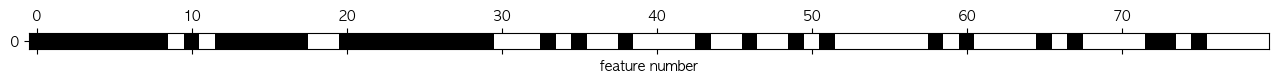

In [135]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('feature number')
plt.yticks([0])

In [136]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
print(lr.score(X_test_selected, y_test))

0.9298245614035088
0.9403508771929825


## 모델 기반 특성 선택 (SelectFromModel 사용)
- 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가하여 가장 중요한 특성들만 선택 (최종적으로 해당 모델을 사용할 필요는 없음)
- 결정 트리모델은 fature_importances_ 속성 제공하며, 선형 모델 계수의 절댓값도 특성의 중요도라 할 수 있다
- 일변량 분석과는 반대로 모델기반 특성 선택은 한 번에 모든 특성을 고려하므로, 상호작용 부분을 반영할 수 있다

In [138]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42), threshold='median') # 중간값을 임계치로 사용

In [139]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) # l1 규제(필요없는 특성 제거)가 들어가있다?
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


([<matplotlib.axis.YTick at 0x7fc1366dfa90>], [Text(0, 0, '0')])

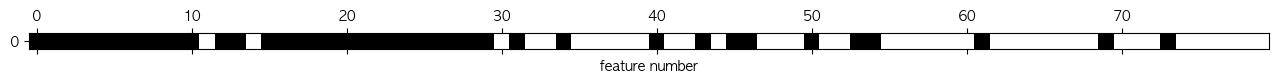

In [98]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('feature number')
plt.yticks([0])

In [99]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
score

0.9473684210526315

## 반복적 특성 선택 (RFE 사용)
- 특성의 수가 각기 다른 일변의 모델이 만든어진다. 두가지 방법이 있음
1. 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가
2. 모든 특성을 가지고 시작해서 종료 조건이 될 때까지 특성을 하나씩 제거

* 회귀 모델에서 사용하는 전진 선택법과 후진선택법 유사


In [142]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 40)

([<matplotlib.axis.YTick at 0x7fee2cefdc10>], [Text(0, 0, '0')])

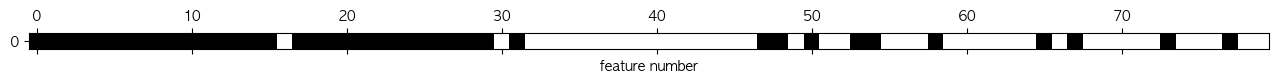

In [143]:
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('feature number')
plt.yticks([0])

In [145]:
## RFE - Stepwise - 회귀에서 사용
house = pd.read_csv('./data/house_sales.csv', sep='\t')
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
outcome = 'AdjSalePrice'

predictors = ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms','PropertyType',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise',
       'ImpsVal', 'ZipCode', 'NewConstruction']

In [146]:
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)
# backward_elimination, forward_selection, stepwise_selection
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtLot, SqFtTotLiving, Bathrooms, Bedrooms, BldgGrade, YrBuilt, YrRenovated, TrafficNoise, ImpsVal, ZipCode, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=621087.84, add ImpsVal
Step: score=620437.40, add SqFtTotLiving
Step: score=619661.90, add YrBuilt
Step: score=619112.54, add BldgGrade
Step: score=618873.30, add ZipCode
Step: score=618770.05, add Bedrooms
Step: score=618726.89, add SqFtLot
Step: score=618708.46, add YrRenovated
Step: score=618699.25, add NewConstruction
Step: score=618698.55, add TrafficNoise
Step: score=618698.55, unchanged None
Intercept: 45751673.759
Coefficients:
 ImpsVal: 1.119001667749545
 SqFtTotLiving: 61.72760671908378
 YrBuilt: -2077.2414130461198
 BldgGrade: 47136.17711662532
 ZipCode: -426.74566783342135
 Bedrooms: -18857.71905541134
 SqFtLot: 0.3055486741899697
 YrRenovated: -14.27876143663052
 NewConstruction: -15916.156221435878
 TrafficNoise: -4030.8869705518505


## 샘플링(Sampling)

### 언더 샘플링
- 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 방법

1. Random Under Sampling : 무작위로 데이터를 제거하는 방법

In [147]:
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)

In [148]:
Counter(y)

Counter({0: 1900, 1: 100})

In [150]:
# majority option을 사용하면 다수의 레이블에서 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄인다
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [151]:
# 0 ~ 1 사이의 값을 입력하면 해당 비율만큼 줄인다
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under, y_under = undersample.fit_resample(x, y)

print(Counter(y_under))

Counter({0: 200, 1: 100})


### 오버 샘플링
- 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시키는 것

1. Random Over Sampling : 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법
2. SMOTE(Synthetic Minority Over-sampling Technique) : 소수 레이블을 지닌 데이터 세트의 관측 값에 대한 K개의 최근접 이웃을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법

In [152]:
# 0 ~ 1 사이의 값을 입력하면 해당 비율만큼 증가시킨다
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [153]:
# minority option을 사용하면 소수의 레이블에서 샘플링하여 다수 레이블의 데이터 수와 동일하게 줄인다
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [154]:
# minority option을 사용하면 소수의 레이블에서 샘플링하여 다수 레이블의 데이터 수와 동일하게 줄인다
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = oversample.fit_resample(x, y)

print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


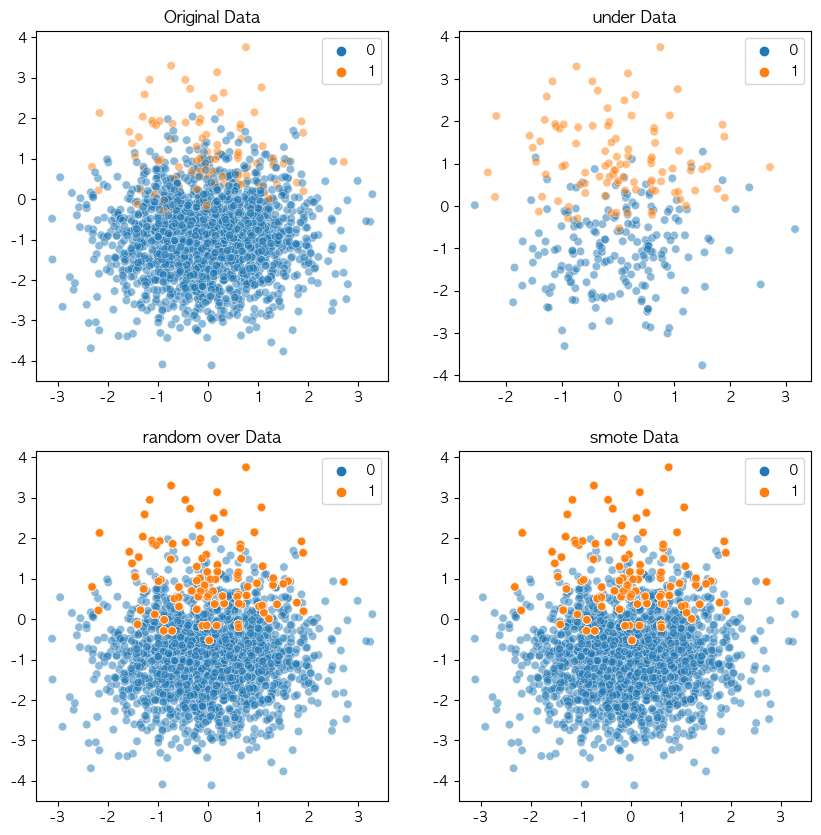

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.scatterplot(x = x[:, 1], y = x[:, 2], hue = y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue = y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue = y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue = y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('under Data')
axes[1][0].set_title('random over Data')
axes[1][1].set_title('smote Data')
plt.show()

## Transformation

In [159]:
sample_df = pd.DataFrame({'first' : range(10), 'second' : range(10,20)})
sample_df.head()

first  second
0      0      10
1      1      11
2      2      12
3      3      13
4      4      14

### cumulative

In [160]:
sample_df['cums'] = sample_df.second.transform('cumsum')
sample_df

first  second  cums
0      0      10    10
1      1      11    21
2      2      12    33
3      3      13    46
4      4      14    60
5      5      15    75
6      6      16    91
7      7      17   108
8      8      18   126
9      9      19   145

### shift data by group

In [161]:
sample_df['group'] = [1,1,1,1,1, 2,2,2,2,2]

In [162]:
sample_df.groupby('group')['first'].shift(-2)

0    2.0
1    3.0
2    4.0
3    NaN
4    NaN
5    7.0
6    8.0
7    9.0
8    NaN
9    NaN
Name: first, dtype: float64

In [116]:
### apply

In [163]:
def amuguna(x):
    x_sort = x.sort_values('second', ascending=False)
    return x_sort

In [164]:
sample_df.groupby('group').apply(amuguna)

first  second  cums  group
group                              
1     4      4      14    60      1
      3      3      13    46      1
      2      2      12    33      1
      1      1      11    21      1
      0      0      10    10      1
2     9      9      19   145      2
      8      8      18   126      2
      7      7      17   108      2
      6      6      16    91      2
      5      5      15    75      2

In [165]:
## type change

In [166]:
sample_df['cums'].astype('object')

0     10
1     21
2     33
3     46
4     60
5     75
6     91
7    108
8    126
9    145
Name: cums, dtype: object

In [167]:
sample_df = sample_df.assign(date_val = '2022-10-04')
pd.to_datetime(sample_df.date_val)

0   2022-10-04
1   2022-10-04
2   2022-10-04
3   2022-10-04
4   2022-10-04
5   2022-10-04
6   2022-10-04
7   2022-10-04
8   2022-10-04
9   2022-10-04
Name: date_val, dtype: datetime64[ns]

# 4. Modeling

# 머신러닝 알고리즘 - 지도학습

## KNN
**설명**
- 훈련 데이터를 저장하여 모델을 만들고, 예측 데이터에 대해 가장 가까운 데이터를 찾는다.
- 가장 가까운 k개의 데이터를 찾은 후, 분류는 해당 값들의 레이블 중 가장 많은 것을, 예측은 해당 값들의 평균 값을 구한다.
- k값이 낮을수록 복잡한 모델이라고 말할 수 있으며, k값이 높으면 복잡도는 높아지고 일반화가 높아 진다

**원리**

**장단점**

||설명|Note|
|--|--|--|
|장점|이해하기 쉽다|교육용|
|단점|예측이 느리고 많은 특성 처리하는 능력 부족|실질적으로 잘 사용 안한다|
|특징|전처리가 필요하다|표준화나 정규화가 안되어 있으며 값의 범위가 달라지기 때문에|

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|이웃의 수|n_neighbors|1,2,3,4,5 ~|5|--|
|거리재는 방법|metric|minkowski|minkowski/Euclidean|--|

In [168]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9368421052631579


In [169]:
param = {'n_neighbors' : range(1, 30)}
grid = GridSearchCV(knn,  param_grid = param)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)})

## LinearRegression (선형회귀)
**설명**
- 선형 회귀 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 예측과 타겟 y사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾는다
- 입력 특성에 대한 선형 함수를 만들어 예측을 수행
- 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법이 없다

**원리**

**장단점**

||설명|Note|
|--|--|--|
|장점|이해하기 쉽다|교육용|
|단점|예측이 느리고 많은 특성 처리하는 능력 부족|실질적으로 잘 사용 안한다|
|특징|전처리가 필요하다|표준화나 정규화가 안되어 있으며 값의 범위가 달라지기 때문에|

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|이웃의 수|n_neighbors|1,2,3,4,5 ~|5|--|
|거리재는 방법|metric|minkowski|minkowski/Euclidean|--|

In [170]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.iloc[:,:-2], iris_data.iloc[:,-2], random_state=42, test_size=0.2)

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.9271105193357898, 0.9403839232537599)

In [171]:
lr.coef_, lr.intercept_

(array([-0.23425621,  0.23591069,  0.53431313]), -0.16932012542923158)

### 다항회귀

In [172]:
cereal = pd.read_csv('./data/cereal.csv')
cereal_a = cereal[cereal.columns[3:]]
cereal_a = cereal_a.loc[cereal_a.sugars >= 0]

In [173]:
cereal_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  76 non-null     int64  
 1   protein   76 non-null     int64  
 2   fat       76 non-null     int64  
 3   sodium    76 non-null     int64  
 4   fiber     76 non-null     float64
 5   carbo     76 non-null     float64
 6   sugars    76 non-null     int64  
 7   potass    76 non-null     int64  
 8   vitamins  76 non-null     int64  
 9   shelf     76 non-null     int64  
 10  weight    76 non-null     float64
 11  cups      76 non-null     float64
 12  rating    76 non-null     float64
dtypes: float64(5), int64(8)
memory usage: 8.3 KB


In [174]:
cereal_a.describe()

calories    protein        fat      sodium      fiber      carbo  \
count   76.000000  76.000000  76.000000   76.000000  76.000000  76.000000   
mean   106.973684   2.513158   1.000000  161.776316   2.144737  14.802632   
std     19.597261   1.064499   1.006645   82.323362   2.398355   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  133.750000   0.750000  12.000000   
50%    110.000000   2.500000   1.000000  180.000000   1.750000  14.500000   
75%    110.000000   3.000000   1.250000  212.500000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   76.000000   76.000000  76.000000  76.000000  76.000000   
mean    7.026316   95.894737   28.618421   2.223684   1.030000   0.823026   
std     4.378656   71.742238   22.250074   0.826215   0.151438   0.233604   
min     0.000000   -1.000000    0.000000   1.000000   0.500000   0.250000   
25%     3.000000   40.000000   25.000000   1.750000   1.000000   0.670000   
50%     7.000000   90.000000   25.000000   2.000000   1.000000   0.750000   
75%    11.000000  120.000000   25.000000   3.000000   1.000000   1.000000   
max    15.000000  330.000000  100.000000   3.000000   1.500000   1.500000   

          rating  
count  76.000000  
mean   42.558301  
std    14.108765  
min    18.042851  
25%    32.932466  
50%    40.253086  
75%    50.971798  
max    93.704912

In [289]:
cereal_a.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

   shelf  weight  cups     rating  
0      3     1.0  0.33  68.402973  
1      3     1.0  1.00  33.983679  
2      3     1.0  0.33  59.425505  
3      3     1.0  0.50  93.704912  
4      3     1.0  0.75  34.384843

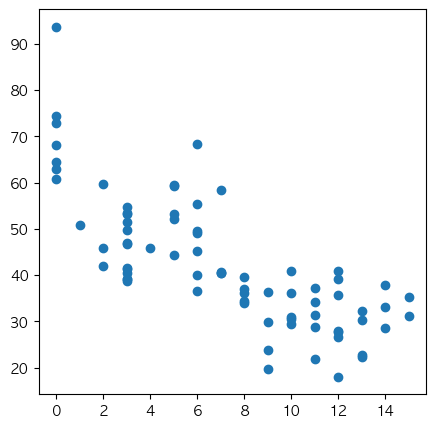

In [175]:
plt.scatter(cereal_a.sugars, cereal_a.rating)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(cereal_a.iloc[:, :-1], cereal_a.iloc[:,-1:], test_size= 0.3)

In [177]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [178]:
polly = PolynomialFeatures(degree=2)
X_train_polly = polly.fit_transform(X_train_scaled)
X_test_polly = polly.transform(X_test_scaled)

In [179]:
lr = LinearRegression()

In [180]:
lr = LinearRegression()
lr.fit(X_train_polly, y_train)
lr.score(X_test_polly, y_test)

0.8625415795071258

In [181]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.8925112363396037

## Regularization(규제)

- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것
- Ridge와 Lasso가 있으며, Ridge는 계수를 제곱한 값에 규제를, Lasso는 계수의 절대값에 규제를 사용한다.
- 일반적으로 Ridge를 더 선호하며, 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들수도 있다.
- alpha를 통해 계수를 줄이는 역할 강도 제어

### Ridge (리지 회귀)
**설명**
- 과대적합이 되지 않도록 모델을 강제로 제한한다
- L1 규제의 결과로 라소를 사용할 때 어떤 계수는 0이 될 수 있다
- L2 규제(리지)가 선호되나, 특성이 많고 그중 일부분만 중요하다면 라쏘가 더 좋을 수 있다. + 분석하기 쉬운 모델을 원한다면(특성의 숫자가 줄어드니)

**원리**
리지는 계수의 L2 노름(norm)의 제곱을 페널티로 적용

**장단점**

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|규제정도|alpha|0 ~ |1|alpha값이 높아지면 계수를 0에 더 가깝게 만들어서 일반화에 도움을 준다 (but 훈련성능은 나빠진다)|

In [182]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9999413786523335, 0.9999283581637907)

In [183]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train), ridge10.score(X_test, y_test)

(0.9964859520556133, 0.9965538030777462)

In [184]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge01.score(X_train, y_train), ridge01.score(X_test, y_test)

(0.9999993307286877, 0.9999990502558951)

### Lasso (라소 회귀)
- 과대적합이 되지 않도록 모델을 강제로 제한한다
- L1 규제의 결과로 라소를 사용할 때 어떤 계수는 0이 될 수 있다
- L2 규제(리지)가 선호되나, 특성이 많고 그중 일부분만 중요하다면 라쏘가 더 좋을 수 있다. + 분석하기 쉬운 모델을 원한다면(특성의 숫자가 줄어드니)라쏘가 선호 됨

**원리**
- 리지는 계수의 L1 노름(norm)의 제곱을 페널티로 적용
- 평균 제곱오차 식에 $ \alpha \sum|w_{j}|항이 추가 $

**장단점**

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|규제정도|alpha|0 ~ |1|alpha값이 높아지면 계수를 0에 더 가깝게 만들어서 일반화에 도움을 준다 (but 훈련성능은 나빠진다)|

In [185]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.983219781568307, 0.986197340603777)

In [186]:
np.sum(lasso.coef_ != 0) # 사용한 계수의 숫자

7

In [187]:
lasso001 = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)
lasso001.score(X_train, y_train), lasso001.score(X_test, y_test)

(0.9999859538431646, 0.9999744362846535)

In [188]:
np.sum(lasso001.coef_ != 0) # 사용한 계수의 숫자

9

### Elasticnet (엘라스틱넷)
- Lasso와 Ridge의 페널티를 결합하였으며 최상의 성능을 낸다. 하지만, L1과 L2 규제를 위한 두 개의 매개변수 조정 필요

In [189]:
elastic = ElasticNet().fit(X_train, y_train)
elastic.score(X_train, y_train), elastic.score(X_test, y_test)

(0.9760731162484418, 0.9804103106737365)

In [190]:
elastic = ElasticNet()
param = {'alpha' : np.arange(0.01, 1, 0.1)}
grid = RandomizedSearchCV(elastic, param_distributions = param )
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=ElasticNet(),
                   param_distributions={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])})

In [191]:
grid.cv_results_, grid.best_score_

({'mean_fit_time': array([0.00335708, 0.00290675, 0.0028522 , 0.00312986, 0.00273657,
         0.00238619, 0.00212445, 0.00209508, 0.00217376, 0.00213947]),
  'std_fit_time': array([3.63735891e-04, 1.29635651e-04, 1.05458766e-04, 2.17510805e-04,
         1.53390665e-04, 1.88632621e-04, 2.58991503e-05, 9.12841941e-05,
         1.02786627e-04, 3.09219246e-05]),
  'mean_score_time': array([0.00229821, 0.00211735, 0.00217328, 0.00232258, 0.00199695,
         0.00177212, 0.00159574, 0.00155535, 0.00168948, 0.00161376]),
  'std_score_time': array([6.58157241e-05, 6.45681180e-05, 9.47897341e-05, 2.26916658e-04,
         8.97551939e-05, 1.60965379e-04, 6.37786410e-06, 7.78077855e-06,
         9.15510456e-05, 2.07944743e-05]),
  'param_alpha': masked_array(data=[0.01, 0.11, 0.21000000000000002, 0.31000000000000005,
                     0.41000000000000003, 0.51, 0.6100000000000001,
                     0.7100000000000001, 0.81, 0.91],
               mask=[False, False, False, False, False, Fals

## 로지스틱 회귀
- 분류 모델로써, 선형 회귀와 동일하게 선형 방정식을 학습
- 확률이 되려면 0~1값을 가져야 하며, 이를 위해 시그모이드 함수(로지스틱 함수)를 이용
- coef의 열은 계수의 값이며,특성의 숫자만큼 계수가 존재한다.행의 숫자는 각 레이블 별로 이진분류를 수행하기 때문이다.

**(시그모이드 함수)**
 
$ \theta = \frac{1}{1 + \epsilon^{-z}} $


**(소프트맥스)**

enum = $ e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7} $

각 클래스별 확률은
s1 = $ \frac{e^{z1}}{esum} $ s2 = $ \frac{e^{z2}}{esum} $  ... 

**장단점**
- 선형 모델은 학습 속도가 빠르고 예측도 빠르다
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해 할 수 있다. 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있다.
(특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때 더욱 그렇다)
- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동. 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|규제정도|alpha|0 ~ |1|alpha값이 높아지면 계수를 0에 더 가깝게 만들어서 일반화에 도움을 준다 (but 훈련성능은 나빠진다)|

> 이진 분류는 양성 여부에 대한 확률 한번만 구하면 된다. 하지만, 다중 분류는 여러개의 클래스에 대해 확률을 구하는 방식으로 클래스별로 값이 구해진다. 0~1사이의 범위에 들게하기 위해 모든 클래스의 합에서, 각 클래스의 값이, 해당 클래스의 값이라고 할 수 있다. 즉, 이진분류는 시그모이드(로지스틱)으로 구하고 소프트 맥스는 z1 ~ z7까지 값을 사용하여, e^z1 ~ e^z7을 계산해서 모두 더한다. e^z1 ~ e^z7을 각각 e^z1 ~ !e^z7까지의 총합으로 나눈다.
> 시그모이드 함수는 이진분류를 한다면, 소프트맥스는 다중분류를 위해 클래스의 숫자만큼 이진분류를 수행 후, 해당 값들을 합한후 각 클래스 값을 나누어 총 합 1이 되는 기준으로 얼만큼 비율을 가지고 있는지 계산한다.


In [194]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(wine_data.iloc[:,:-1], wine_data.iloc[:,-1])
lr.fit(X_train, y_train)
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.7716923076923077, 0.7820197044334976)

In [195]:
lr.predict_proba(X_test[:5])

array([[0.01026375, 0.98973625],
       [0.00821514, 0.99178486],
       [0.35035406, 0.64964594],
       [0.19365017, 0.80634983],
       [0.30384607, 0.69615393]])

In [198]:
decision = lr.decision_function(X_test[:5])
print(np.round(decision, decimals= 2))

[4.57 4.79 0.62 1.43 0.83]


In [199]:
# from scipy.special import softmax
# proba = softmax(decision, axis=0)
# print(np.round(proba, decimals=3))

## 나이브 베이즈 분류기
- LogisticRegression이나 LinerSVC같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 일반화 성능이 뒤진다
- 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문
- GaussianNB, BernoulliNB, MultinormialNB 세가지가 있으며, GaussianNB는 연속적인 어떤데이터에도 적용 가능, BernoulliNB는 이진 데이터를, MultinomialNB는 카운트 데이터(문장에 나타난 단어의 횟수 등)에 사용한다. BernoulliNB, MultinormialNB는 주로 텍스트 분류때 사용한다.
- 선형모델과 장단점이 비슷하다

**장단점**
- 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽다.
- 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다

**원리**
나이브 : 예측한 특성이 상호 독립적이라는 가정 하에 확률 계산을 단순화함
베이즈 : 입력 특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 베이즈 정리를 기반으로 계산

베이즈 정리에서 P(A|B)는사건 B가 주어졌을 때 사건 A가 일어날 확률

P(A|B) = $ \frac{P(B|A)P(A)}{P(B)} $
- 나이브 베이즈의 목표는 n개의 특징을 가진 심플 데이터 x가 주어졌을 때 k개의 클래스 중 하나에 속학 확률을 결정하는 것
- 샘플 데이터는 $ x_{1}, x_{2}, x_{3}, ... , x_{n}의 값을 가진 특징으로 구성되고, y_{k}는 샘플 데이터가 k에 속하는 사건을 나타냄  $

사전 확률 : 관측값이 특징에 대한 지식없이 클래스가 어떻게 분포되어 있는지 나타냄
사전 확률은 사전에 결정 되어 있거나, 학습 샘플 데이터를 이용해 학습시킬 수도 있음

$ P(y_{k}|x)는 사후 확률 $

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|복잡도조정|alpha|0 ~ |1|alpha값이 높아지면 복잡도가 낮아진다|

> 이진 분류는 양성 여부에 대한 확률 한번만 구하면 된다. 하지만, 다중 분류는 여러개의 클래스에 대해 확률을 구하는 방식으로 클래스별로 값이 구해진다. 0~1사이의 범위에 들게하기 위해 모든 클래스의 합에서, 각 클래스의 값이, 해당 클래스의 값이라고 할 수 있다. 즉, 이진분류는 시그모이드(로지스틱)으로 구하고 소프트 맥스는 z1 ~ z7까지 값을 사용하여, e^z1 ~ e^z7을 계산해서 모두 더한다. e^z1 ~ e^z7을 각각 e^z1 ~ !e^z7까지의 총합으로 나눈다.
> 시그모이드 함수는 이진분류를 한다면, 소프트맥스는 다중분류를 위해 클래스의 숫자만큼 이진분류를 수행 후, 해당 값들을 합한후 각 클래스 값을 나누어 총 합 1이 되는 기준으로 얼만큼 비율을 가지고 있는지 계산한다.


In [344]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [345]:
gaus = GaussianNB()
gaus.fit(X_train, y_train)
gaus.score(X_test, y_test)

0.795

In [337]:
sky = pd.read_csv('./data/Skyserver.csv')

In [338]:
sky.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [340]:
sky['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [341]:
features = list(sky.columns)
features.remove('class')

X = sky[features]
y = sky['class']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y)

In [343]:
print(X_train.shape)

(7000, 17)


In [347]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.795

## 결정트리

- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장
- 부모와 자식 노드 사이의 불순도 차이를 정보 이득 이라고 한다.
- 스케일을 조절을 할 필요가 없다.
- feature_importances_를 통해 중요한 특성을 알 수 있다
- 가지치기를 통해 일반화를 시킨다


**원리**
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2) 
(불순도가 0인것을 순수 노드라고 한다)
- 정보이득(불순도 차이) : 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도
- 트리 모델은 정보 이득이 최대가 되도록 데이터를 나눈다

**복잡도 제어**
- 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합 된다. 
- 과대적합을 막는 전략은 크게 두 가지이다.
1. 트리 생성을 일찍 중단하는 전략(사전 가지치기) : 최대 깊이 또는 리프노드 숫자 제어, 노드 분할을 위한 포인트(데이터) 최소 개수 제한
2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략 (사후 가지치기)
* sklearn은 사전 가지치기만 지원

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|사전 가지치기|max_depth|1 ~ | ? |값이 낮을수록 일반화|
|사전 가지치기|max_leaf_nodes|1 ~ | ? | ? |
|사전 가지치기|min_sample_leaf|1 ~ | ? |값이 높을수록 일반화|

> 특성 중요도, 가지치기(자동으로 언제까지(정보이득 최소 또는 맥스 depth 등) 하라고 할 수 있다

**장단점**
- 설명하기 쉽다.
- 데이터 스케일에 구애받지 않는다. -> 정규화나 표준화와 같은 전처리가 필요 없다 
- 과대적합이 되는 경향이 있어 일반화 성능이 좋지 않은 편이다
- 트리기반 회귀모델은 훈련 데이터의 범위 밖의 값에 대해 예측을 할 수 없다 (외삽, knn과 유사한 문제)

In [144]:
tree = DecisionTreeClassifier(max_depth= 3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8381538461538461

In [145]:
tree.feature_importances_
tree.feature_names_in_

array(['alcohol', 'sugar', 'pH'], dtype=object)

[0.14555337 0.84681684 0.00762979]


<Axes: >

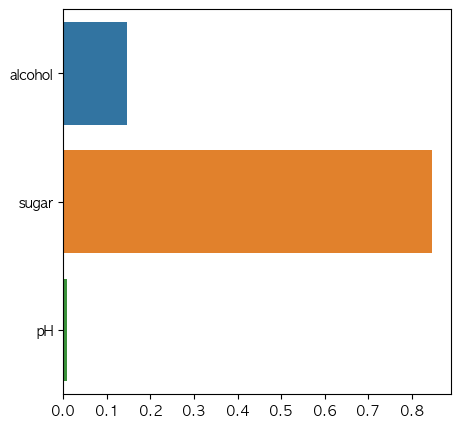

In [146]:
print(tree.feature_importances_)

sns.barplot(x = tree.feature_importances_, y = tree.feature_names_in_, )

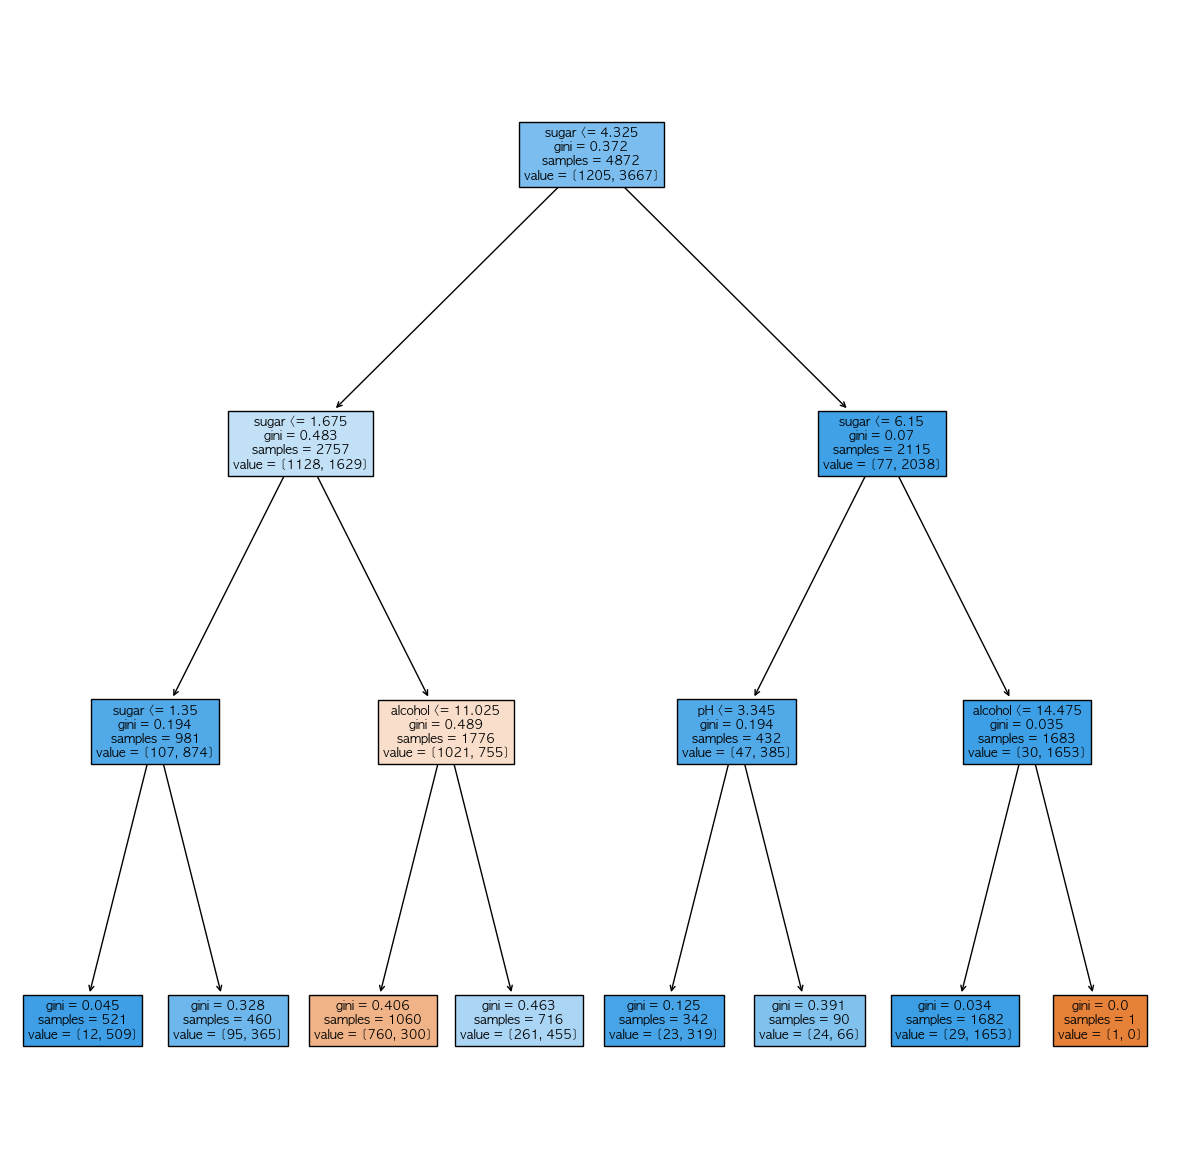

In [147]:
plt.figure(figsize=(15,15))
plot_tree(tree, filled=True, feature_names= X_train.columns)
plt.show()

## 앙상블
- 여러 모델을 연결하여 더 강력한 모델을 만드는 기법
- 대부분 결정 트리 기반으로 만들어져있으며, 정형 데이터를 다루는데 가장 뛰어난 성과를 내는 알고리즘

## RandomForest
**데이터 포인트(부트스트랩 방식으로 추출)나 특성(트리별 부분 집합 사용)을 이용하여 무작위성을 주입하여 여러 결정 트리의 묶음**

- 랜돔 포레스트는 각 트리를 훈련하기 위한 데이터를 랜덤하게 만든다.
- 데이터를 만들 때 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만들며 이때 한 샘플이 중복되어 추출 가능하다.
(부트스트랩 방식)
- 노드 분할 시 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중 최선의 분할을 찾는다.
- 여러 개의 결정 트리를 만들고 결과를 평균내서 사용

**원리**
- 모든 트리의 예측을 만든 후, 회귀의 경우에는 이 예측들을 평균하여 최종 예측, 분류의 경우는 약한 투표 전략을 사용
- 부트스트랩 방식으로 데이터 숫자만큼 임의로 추출한다. (중복 추출 가능)
- 랜덤하게 특성을 골라서($ 사이킷런에서는 분류일땐 \sqrt{특성수} $만큼, 회귀때는 모두 사용) 무작위성 주입

**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|트리숫자|n_estimater를|1 ~ | 100 |100|
|특성숫자|max_features| 1 ~ |분류 = sqrt(n_features) / 회귀 = n_features|max_feature=n_feature는 무작위성 없음, max_features값이 크면 트리들이 매우 비슷하고, 낮으면 트리들은 많이 달라 진다  |
|병렬 처리 숫자|n_jobs|-1 or 1 ~ | |-1사용 시 모든 cpu코어 사용 |
|사전 가지치기|max_depth|1 ~ | ? |값이 낮을수록 일반화|

**장단점**
- 데이터 전처리 하지 않아도 높은 성능을 낼 수 있다
- n_jobs를 통해 병렬로 트리 생성 가능하여 속도 이점이 있다(gradient boosting은 순차적으로 수행하여 느림)
- 속도와 메모리 제약이 있는 소프트웨어의 app이면 선형 모델 더 선호

## ExtraTree
- 부트스트랩 미사용, 결정 트리를 만들 때 전체 훈련 세트를 사용
- 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다
- 랜덤 포레스트와 달리 DescisionTreeClassfier(spiltter='random')을 사용하고 부트스트랩 샘플링은 적용하지 않는다.
(노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할)
- 랜덤 포레스트와 다른 방식으로 무작위성을 주입, 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률 평균값 사용

**장단점**
- 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리 훈련이 필요. 하지만 랜덤하게 노드를 분할하기 때문에 빠른 속도로 가능


## Gradient Boosting
- 깊이가 얕은 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법이며, 분류/회귀 모두에 사용 가능
- 랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다
- 무작위성은 없으며, 강력한 사전 가지치기를 사용. 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다
- 가장 강력하고 널리 사용되는 모델 중 하나이나, 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 단점이 있다.
- 가장 중요 매개변수는 n_estimators와 learning_rate이다. 두 변수는 매우 깊게 여관되며, learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리가 필요
- n_estimators가 클수록 좋은 랜덤 포레스트와 달리, 그레이디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대접할될 가능성이 높아짐
- 손실 값은 실수값이며, 손실값을 낮추기 위해 (예측이던 분류던)회귀 트리가 사용된다.(Decision Tree Regressor)


**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|트리숫자|n_estimater|1 ~ | 100 | |
|학습율|leaning_rate| |  | 이진 트리의 오차 보정하는 정도 |
|사전 가지치기|max_depth|1 ~ | 3 |값이 낮을수록 일반화, 통상 5미만으로 설정|

**장단점**

- 데이터 스케일에 구애받지 않는다. -> 정규화나 표준화와 같은 전처리가 필요 없다 (트리 특성)
- 희소한 고차원 데이터에는 잘 작동하지 않다. (트리 특성)
- 매개변수 조정에 대한 노력이 필요하며 훈련 시간이 길다

> 예측 시간이 중요하거나 성능이 더 필요할 때 이용 (먼저 안정적인 랜덤포레스트를 먼저 사용 후)



## Histogram Gradient
- Gradient Boosting의 속도와 성능을 개선하였으며, 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘
- 특성을 256개의 구간으로 나누기 때문에 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.
- 256개의 구간 중에서 하나를 뗴어 놓고 누락된 값을 위해서 사용, 따라서 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없음

## Bagging (Bootstrap aggregating)
- 부트스트랩을 이용하여 분류기를 각기 다르게 학습시키며, 분류기가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측, 그렇지 않으면 빈도가 높은 클래스 레이블이 예측 결과로

In [148]:
lr = LogisticRegression(penalty='l2', C= 0.8, max_iter=1000)
bc = BaggingClassifier(lr, n_estimators=100, oob_score=True, n_jobs= -1)
bc.fit(X_train, y_train)
print(bc.score(X_train, y_train), bc.oob_score_, bc.score(X_test, y_test))

0.7754515599343186 0.7750410509031199 0.7926153846153846


## AdaBoost (Adaptive Boosting)
- 그레이디언트 부스팅처럼 약한 학습기를 사용하나, 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련
- 훈련된 각 모델은 성능에 따라 가중치가 부여되며, 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택


**하이퍼파라미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|트리숫자|n_estimater|1 ~ | 100 | |
|학습율|leaning_rate| |  | 이진 트리의 오차 보정하는 정도 |


In [149]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print(ada.score(X_train, y_train), ada.score(X_test, y_test))

0.8692528735632183 0.8590769230769231


## 선형서포트벡터머신
- 분류 모델로써, 선형 회귀와 동일하게 선형 방정식을 학습
- 확률이 되려면 0~1값을 가져야 하며, 이를 위해 시그모이드 함수(로지스틱 함수)를 이용
- coef의 열은 계수의 값이며,특성의 숫자만큼 계수가 존재한다.행의 숫자는 각 레이블 별로 이진분류를 수행하기 때문이다.


|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|규제정도|C|0 ~ |1|C 값이 높아지면 데이터 각각에 맞추려고 한다.-> 복잡도 상승, 과대적합|


## 커널 서포트벡터머신 (SVM)
- 입력 데이터에서 단순한 초평면으로 정의도지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
- 특성 값의 범위가 비슷해 지도록 전처리가 필요하다

**원리**
- 커널기법 : 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습 시킬 수 있는 것
- 서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트 (훈련 데이터의 일부만 결정 경계를 만드는데 영향을 준다)

- 학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지 배운다.
- 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 주며, 바로 두 클래스 사이의 경계에 위치한 데이터 포인트들이다.
- 이런 데이터 포인트를 서포트 벡터라 하며, 이로인해 서포트 벡터 머신이란 이름이 유래
- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다. 분류 결정은 서포트 벡터까지의 거리에 기반하며, 서포트 벡터의 중요도는 훈련 과정에서 학습(SVC객체의 dual_coef_속성에 저장)
- 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산

$ k_{rbf}(x_{1}, x_{2}) = exp(-\gamma || x_{1} - x_{2})||^{2}) $

**하이퍼파리미터**
- gamma 매개변수는 r로 가우시안 커널 폭의 역수에 해당. gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
- 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다.
- C매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수. 매개변수는 각 포인트의 중요도를 제한한다.

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|규제정도|C|0 ~ |1|C 값이 높아지면 데이터 각각에 맞추려고 한다.-> 복잡도 상승, 과대적합|
|커널 폭의 역수|Gamma|1 ~ 0| 1 / n_features | 하나의 훈련 샘플이 미치는 영향의 범위이며 값이 작을수록 영향 범위가 커진다 |
|커널|kernel|1 ~ 0| rbf | 커널종류 |

**장단점**
- 데이터의 특성이 적어도 복잡한 결정 경계를 만들 수 있다
- 고차원 및 저차원에서도 잘 작동하지만 샘플이 많을 때는 잘 맞지 않는다. (속도와 메모리 측면도 영향)
- 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다
- 분석하기 어렵다.

> 전처리/매개변수 설정이 복잡하여, 랜덤포레스트나 그레이디언트 부스팅의 트리 기반 모델을 많이 사용 된다. 특성값이 비슷하면 시도해 볼만 하다.

In [150]:
from sklearn.svm import SVC

In [151]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8461538461538461

# 머신러닝 알고리즘 - 비지도학습
- 타겟값이 없을 때 사용하는 머신러닝 알고리즘. 입력 데이터만으로 데이터에서 지식을 추출
- 탐색적 데이터 분석때 많이 사용되며, 지도 학습의 전처리 단계에서도 사용

**비지도 변환 : 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘**
- 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소
- 시각화를 위해 데이터셋을 2차원으로 변경하는 경우
- 비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도 한다. 많은 텍스트 문서에서 주제를 추출하는 것

**군집 알고리즘 : 데이터를 비슷한 것끼리 그룹으로 묶는 것**
- 소셜에서 같은 사람 사진 분류 등

## 군집

## K-means (k-평균 알고리즘)
- 데이터를 K개의 클러스터로 군집화하며 각 클러스터와 거리 차이의 분산을 최소화 하는 방향으로 작동
- 자동으로 중심을 찾아내는 역할을 한다. cluster_centers를 통해 중심 값을 알 수 있으며, transform 메서드를 통해 중심까지의 거리를 알 수 있다
- 두 단계를 반복하며, 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료
 1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당
 2. 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정

**원리**
1. 무작위로 k개의 클러스터 중심을 정한다
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가서 반복

**장단점**
- 가장 간단하고 널리 사용. 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다. 
- 속성의 개수가 적은 단순한 데이터에 많이 활용
- 변수가 많을 경우 군집화의 정확도가 떨어진다. 이때는 차원 축소를 고려
- 군집의 수 K를 스스로 판단하여 알고리즘에 적용

**군집개수 판단 방법**
1. 콜린스키 하라바츠 스코어
- 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산의 합의 비율이다
- 점수가 높을수록 성능이 좋다

**엘보우방법**
- 클러스터 내 오차제곱합을 클러스터 개수마다 비교하는 방법
- 반복문을 통해 클러스터 개수를 늘려가면서 계산한 SSE 비교
- SSE가 급격히 줄어드는 부분, 기울기가 소실되는 구간을 elbow로 판단하고, 그 순간을 최적의 클러스터 개수로 판단
- 군집의 숫자를 작은값에서 큰값으로 나눠보면서, 클러스터의 inertia(중심에서 속한 샘플들의 거리를 평균)를 구하며 꺽이는 구간을 k값으로

**하이퍼파리미터**
1. n_clusters(k) : 그룹의 숫자

In [152]:
iris = pd.read_csv('./data/iris.csv')
X = iris.drop('target', axis=1)
X

sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [153]:
# K 값 탐색 / K=3일때 가장 숫자가 높다. 
for k in range(2, 10):
    kmean_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmean_model.labels_
    print(calinski_harabasz_score(X, labels))

513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295
448.8714494416451
436.61302488142496
414.5303174051382


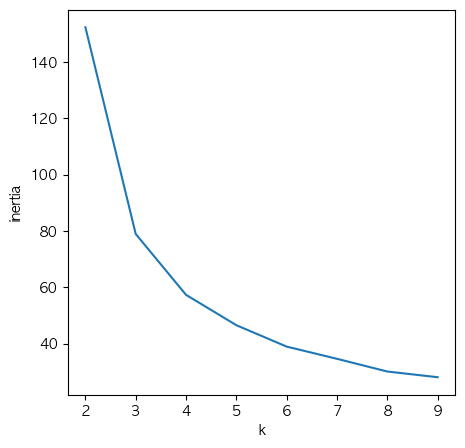

In [154]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [155]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby(['cluster']).mean()

sepal length  sepal width  petal length  petal width
cluster                                                      
0            5.901613     2.748387      4.393548     1.433871
1            5.006000     3.418000      1.464000     0.244000
2            6.850000     3.073684      5.742105     2.071053

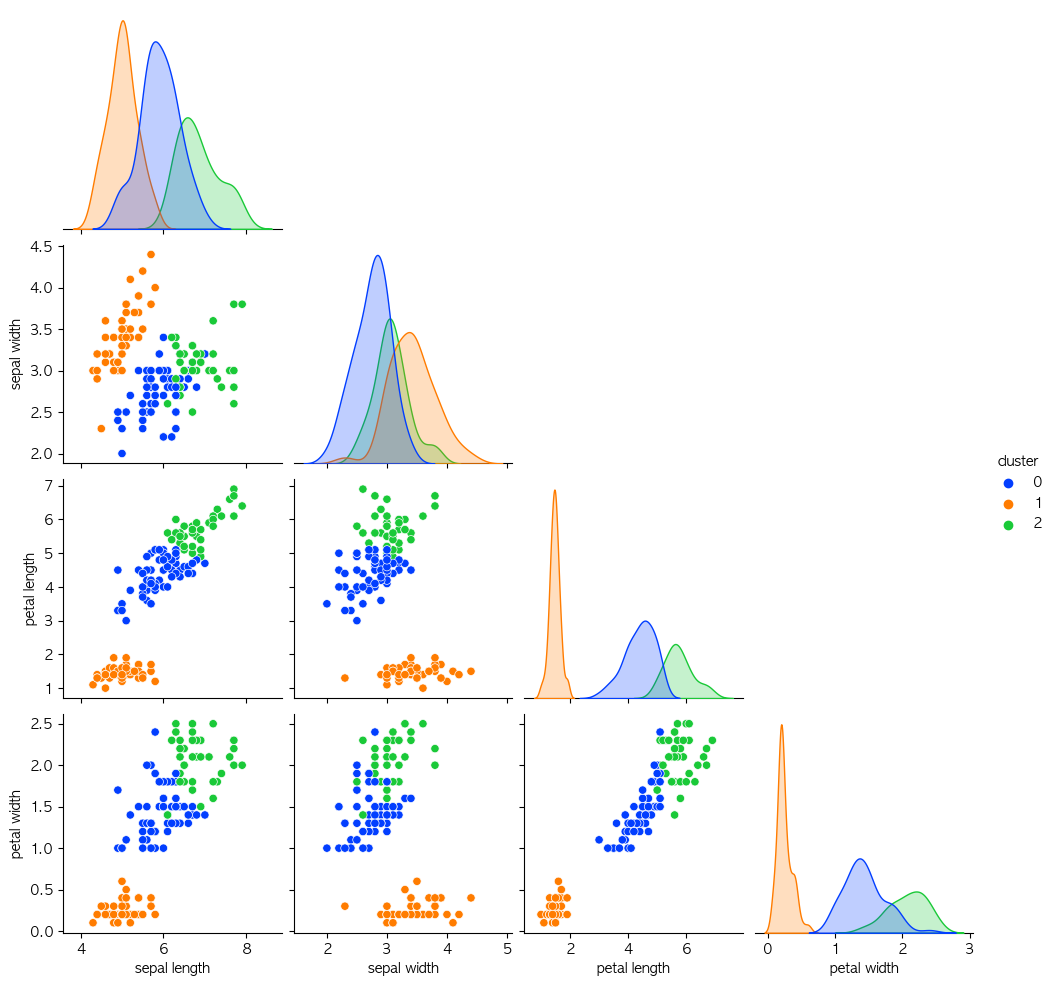

In [156]:
sns.pairplot(iris, diag_kind='kde', hue='cluster', corner=True, palette='bright')

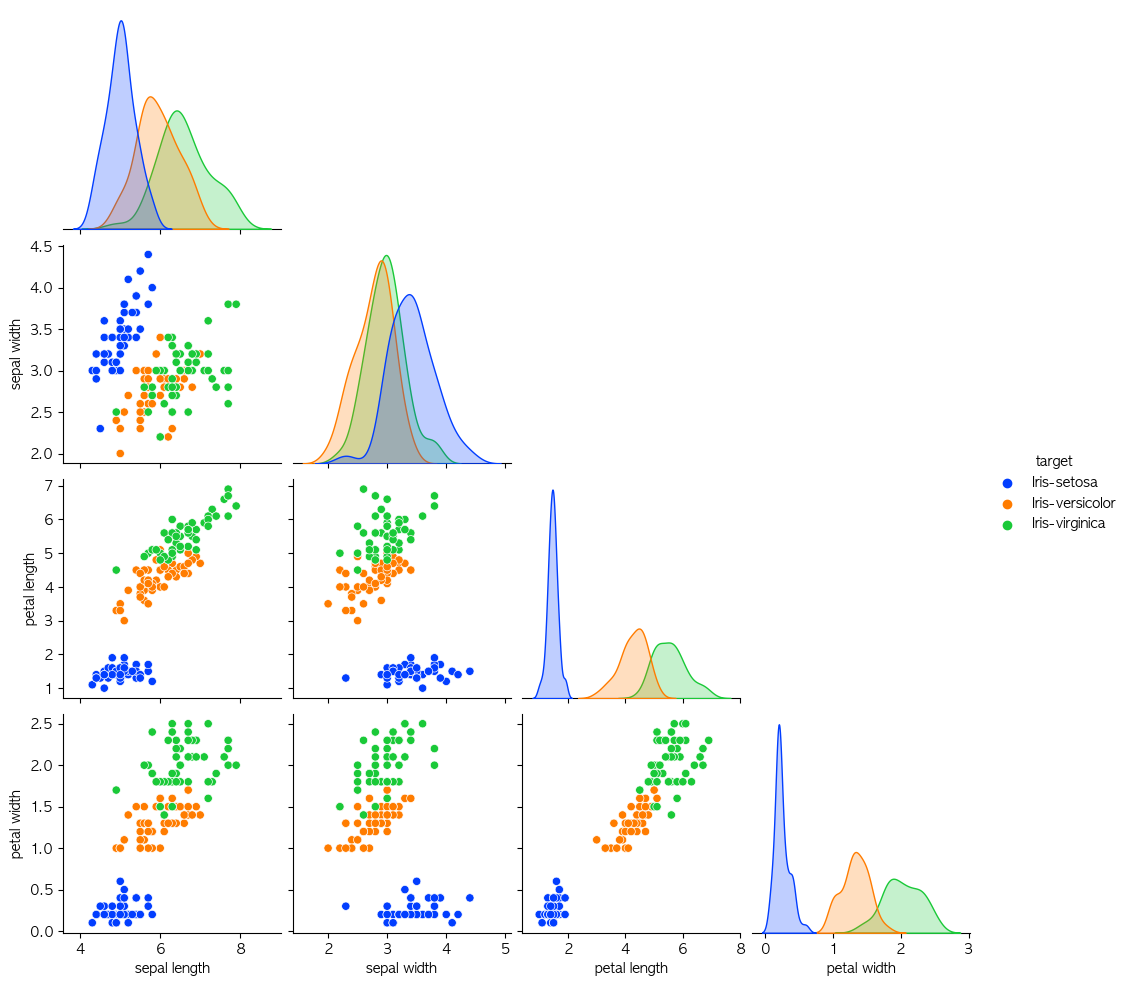

In [157]:
sns.pairplot(iris.drop(columns=['cluster']), diag_kind='kde', hue='target', corner=True, palette='bright')

# 병합 군집
- 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다
- scikit-learn에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합친다.
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정
- 병합 군집은 새로운 데이터 포인트에 대해 예측을 할 수 없다.(predict method 미존재) 대신 훈련 세트로 모델을 만들고 클러스터 정보를 얻기 위해 fit_predict 사용
## 계층적 군집과 덴드로 그램
- 병합 군집은 계층적 군집을 만든다.

### 옵션
- ward : 기본값인 ward 연결(linkage)은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비교적 비슷한 클러스터가 만들어진다.
- average : 평균 거리가 가장 짧은 두 클러스터를 합친다
- complete(최대연결) : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다

## PCA (Principal component analysis / 주성분분석)
- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술, 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태 (components_ 속성에 저장)
- 다른 분류기나 알고리즘과 연관해서 사용 되며, 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
- 하이퍼파라미터 n_components에 주성분 갯수 지정 (자연수는 갯수 지정, 0.x~1은 설명 된 분산 비율 지정)

**원리**
- 데이터를 가장 잘 표현할 수 있는 방향, 즉 분산이 가장 큰 방향을 찾는다(상관관계가 가장 큰 방향)
- 그리고, 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다
- 데이터의 회전과 이동
- 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분 이라고 한다. 일반적으로 원본 특성 개수만큼의 주성분이 있다.
> 가장분산이 큰 = 데이터를 잘 표현한 주성분을 찾는다. 해당 선에 속한 값.. 그리고 수직으로 다음 주성분을 찾는다. 즉, 2차원 데이터라고 하면, 선형 회귀처럼 가장 잘 표현 된 직선이 주성분이되고, 해당 값은 원점에서부터 해당 선의 대응되는 위치의 값은 1차원 데이터로 된다. 
그리고 다음 주성분으로 수직으로 찾으면 해당 실제 값이 되며 이는, 주성분 숫자와 원본 숫자가 같은.. 이런식으로 늘려간다 

**하이퍼파리미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|주성분수|n_component|1 ~ | - |주성분 숫자|
|화이트닝(백색화)|whiten|1 ~ | - |주성분의 스케일이 같아 지도록 조정 = 변환 후 StandardScaler과 동일|

**장단점**
- 그래프의 두 축을 해석하기 쉽지 않다

> PCA수행전에 스케일링 표준화 필요하다.

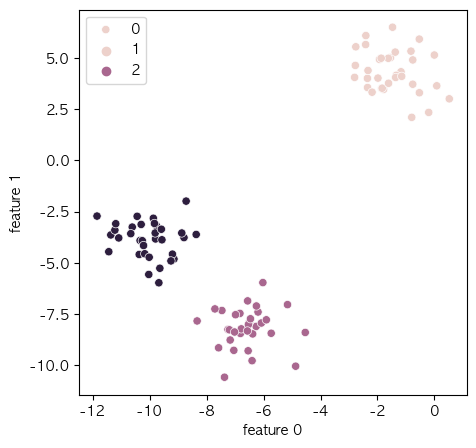

In [204]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

sns.scatterplot(x = X[:, 0], y =X[:, 1], hue= assignment)
plt.legend(['0', '1', '2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

# DBSCAN
- 클러스터의 개수를 미리 지정할 필요가 없다.
- 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않은 포인트 구분도 가능
- 병합 군집이나 k평균보다는 느리지만 비교적 큰 데이터셋에도 적용 가능
> 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다. 이런 지역을 특성 공간의 밀집 지역(dense region)이라고 한다. DBSCAN의 아이디어는 데이터의 밀접지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분
- 매개변수로 min_sample와 eps가 있으며, 한 데이터포인트에서 eps 거리 안에 데이터가 min_samples개수만큼 들어 있으면 핵심 샘플로 분류, eps보다 가까운 핵심 샘플은 동일한 클러스터로 합친다


In [207]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
cluster = dbscan.fit_predict(X)

# 군집 알고리즘의 비교와 평가
- 1(최적일 때)와 0(무작위로 분류될 때) 사이의 값을 제공하는 ARI와 NMI가 가정 널리 사용하는 지표
- 평가할때 adjusted_rand_score나 normalized_mutual_info_score같은 도구를 사용해야 한다. (not accuracy_score)
- 군집 알고리즘을 적용할 때 보통 결과와 비교할 타깃값이 없다. 데이터가 속한 클러스터를 알고 있다면, 분류기와 같은 지도 학습 모델을 만든다. 그러므로 ARI나 NMI같은 지표는 성능 평가보다는 알고리즘 개발할 때 도움

- 타깃값이 필요 없는 군집용 지표는 실루엣 계수가 있다. 하지만 지표는 실제로 잘 동작하진 않는다. 클러스터의 밀집 정도를 게싼하는 것으로, 높을수록 좋으며 최대 점수는 1

NameError: name 'mglearn' is not defined

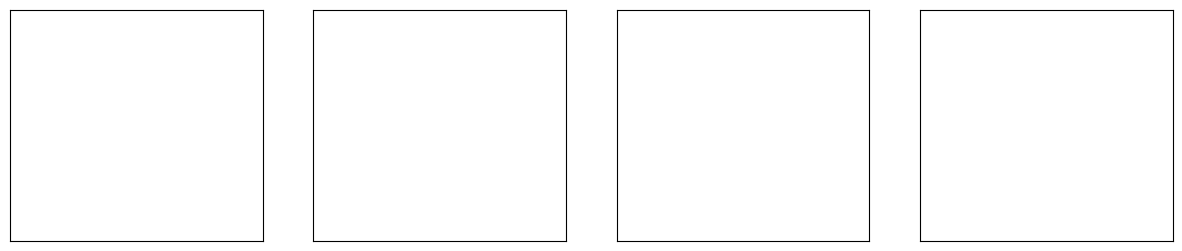

In [210]:
# 실루엣

# k-평균, 병합군집, DBSCAN 실루엣 이용한 비교

from sklearn.metrics.cluster import silhouette_score
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks' : ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[: ,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

## 비음수 행렬 분해
- PCA와 비슷하고 차원 축소에도 사용
- PCA에서는 분산이 가장 크고 수직인 성분을 찾았다면, NMF에서는 음수가 아닌 성분과 계수값을 찾는다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 한다.
- 음수가 아닌 특성을 가진 데이터에만 적용 가능하며, 여러 사람의 목소리가 담긴 오더오 트랙이나, 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여 만들어진 데이터에 유용


### t-SNE를 이용한 매니폴드 학습
- 매니폴드 학습은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공하며, 목적이 시각화이다.
- 일부 매니폴드(t-SNE 포함)는 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못한다.
- 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용 하지 않는다.

#### t-SNE
- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
- 먼저 t-SNE는 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다.
- 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중. 이웃데이터 포인트에 대한 정보를 보전하려 노력

# 딥러닝 알고리즘
- 인공신경망에서는 교차 검증보다는 검증 세트를 이용한다. -> 데이터가 크기 때문에 검증 점수가 안정적이고, 교차 검증 사용하게 되면 시간이 오래 걸리기 때문

## MLP (Multilayer perceptrons 다층퍼셉트론)
- 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 할 수 있다
- 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋다. (표준점수)

**원리**
- 은닉층 : 
- 복잡도 : 은닉층의 개수와 각 은닉층의 유닛수에 따라 결정
- 여러 개의 가중치 합을 계산하는 것은 수학적으로 하나의 가중치 합을 계산하는 것과 같다. 그래서 activation 함수를 두어 결과가 나올 수 있도록 하고 가중치 합을 계산하여 출력 값을 만든다. 
- 초기에 가중치가 무작위로 선정되어, 모델 성능에 영향을 줄 수 있다.


**하이퍼파리미터**

|Title|Param|Value|Default|Note|
|--|--|--|--|--|
|은닉층수|hidden layer|0 ~ |1|C 값이 높아지면 데이터 각각에 맞추려고 한다.-> 복잡도 상승, 과대적합|
|유닛 개수|unit number|1 ~ 0| 1 / n_features | 하나의 훈련 샘플이 미치는 영향의 범위이며 값이 작을수록 영향 범위가 커진다 |
|규제|alpha|1 ~ 0| rbf | 커널종류
|학습횟수|max_iter|1 ~ 0| rbf | 커널종류

**장단점**
- 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다
- 충분한 연산시간과 데이터와 함께 매개변수를 조정하면 높은 성능이 나온다
- 단점으로는 학습이 오래 걸리고, 전처리에 주의해야 한다.

> 일반적으로 먼저 충분히 과대적합되어서 문제를 해결 만한 큰 모델을 만든 후, 신경망을 단순화 하거나 규제 등을 이용하여 일반화 한다.

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
fig, axs = plt.subplots(1, 10, figsize = (10,10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()



In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 10)

In [ ]:
model.evaluate(val_scaled, val_target)

# 평가
- 데이터가 아주 많지 않다면 교차검증을 수행한다. (데이터가 많은 딥러닝은 홀드아웃으로하는 것이? 비용적인 측면에서나 데이터도 많으니깐...)
- 그리드 서치 등을 수행할 때도 테스트 데이터로 하이퍼파라미터 튜닝을 하지 않는다. 테스트 데이터는 철저히 테스트 용도로!
- 불균형 데이터에 대해 정밀도, 재현율, f1-score 등을 적절히 이용하여 평가할수 있도록 한다

# 데이터분할

## 검증세트

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2, stratify=y_data)

In [ ]:
X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(X_data, y_data, random_state=42, test_size=0.2)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sub, y_train_sub)
print(dt.score(X_train_sub, y_train_sub))
print(dt.score(X_validation, y_validation))

### 교차검증
- 과적합이란 학습 데이터에만 맞춰서 모델링을 진행하다 보니 특정 데이터에만 맞게 학습이 진행되어 새로운 데이터가 들어왔을 때 그 데이터에 대해서는 제대로 예측을 수행하지 못하는 문제가 발생하는 것을 의미한다.이를 해결하기 위해 '교차검증'이라는 방법을 통해 학습을 수행한다.
- 교차검증이란 학습 데이터를 다시 학습 데이터와 검증 데이터 세트로 분할하여 학습과 검증을 여러번 진행한 후에 최종적으로 테스트 데이터를 이용해서 정확도를 평가하는 모델이다. 이를 통해 여러 데이터들을 바탕으로 모델링을 함으로서 과적합의 문제를 해결할 수 있다.

### KFold
- 교차 검증의 가장 대표적인 예로 ***K 폴드*** 교차 검증이 있다. 학습 데이터를 k개의 데이터로 나눈 뒤에 k 개의 데이터셋들을 돌아가면서 모두 검증 데이터로 활용한다. 이때 (k-1)/k 는 학습 데이터, 1/k는 검증 데이터로 이용하여 검증하는 과정을 k번 거치는 모델이다. 사이킷 런에서는 이 모델을 KFold 와 StratifiedKFold 클래스를 통해 제공한다.

> KFold 문제점
불균형한 분포도를 가진 레이블 데이터 집합에 대한 정확도 감소
분류를 해야 하는 데이터셋에서 라벨이 비율이 불균형한 경우에 문제가 발생한다. 라벨에 0,1,2 로 이루어진 데이터가 있다고 할 때 0이 극도로 적거나 극도로 많은 경우에 데이터셋을 랜덤으로 분류해버리면 0이 전체를 차지하거나(극도로 많을 경우) 0이 아예 없는 경우(극도로 적은 경우)가 발생할 수 있다. 0이라는 데이터의 존재가 중요한 경우에 이렇게 되면 0에 대한 정확도가 현저히 떨어질 수 있다. 사기와 같은 경우에 사기를 당하는 경우를 0 당하지 않는 경우를 1이라고 라벨링 하면 0은 극도로 적은 확률에 불과하지만 0이라는 라벨을 판별하는 것이 중요할 수 있다. 이러한 경우에 KFold 클래스는 라벨의 비율을 전혀 고려하지 않고 데이터셋을 나누기 때문에 문제가 발생한다.

### StratifiedKFold
- KFold의 문제점을 보완하기 위해 이 클래스가 나왔다. 사용법은 KFold와 거의 동일하지만 이 모델을 라벨의 원본 데이터의 비율을 맞춰 데이터들을 분리한다. 
- 차이점으로 StritifiedKfold(n_splits=5) 를 통해 객체를 생성한다. split 함수 사용 시 파라미터로 레이블 도 넣어 준다.

### cross_val_score
- 위처럼 KFold 기법을 for 문을 활용하지 않고 한번에 해주는 함수이다. 

In [ ]:
score = cross_val_score(dt, X_data, y_data, cv=StratifiedKFold())
score

In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(dt, X_data, y_data, cv=StratifiedKFold())
score.mean()

### LOOCV 
- 폴드 하나에 샘플 하나만 들어 있는 K-겹 교차 검증

In [ ]:
from sklearn.model_selection import LeaveOneOut

logreg = LogisticRegression()
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(scores)
scores.mean()

### 임의 분할 교차 검증
- 임의 분할 교차 검증에서는 train_size 만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 포인트로 테스트 세트를 만들도록 분할. n_splits 횟수만큼 반복
- Train/Test Set에 대한 크기를 독립적으로 조절할 때 유용

In [ ]:
# 테스트셋의 50%를 훈련 세트로, 50%를 테스트 세트로 10 회 반복
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

### 그룹별 교차 검증
- 그룹을 나타내는 값을 매개변수로 받을 수 있으며, groups 배열은 훈련 세트와 테스트 세트로 만들 때 분리 되지 않고 함께 뭉쳐 있도록 지정하는 것

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups = groups, cv=GroupKFold(n_splits=3))
scores

### 반복 교차 검증
- 데이터 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복 수행

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

rskfold = RepeatedStratifiedKFold(random_state=42) # default = 10
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
scores

## 하이퍼파라미터 찾기

### GridSearch
- 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- cross_validate와 다르게, 모델을 return해주며 해당 모델을 통해 predict가 가능하다
- train / test set으로 데이터를 분할 후, train데이터를 학습 및 검증에 사용한다. test 데이터는 매개변수(하이퍼파라미터) 선택에 사용되지 말아야 한다

In [ ]:
params = {'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1, 1],
         'max_depth' : [1, 2, 3, 10, 20]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, cv=StratifiedKFold())
gs.fit(X_train, y_train)
dt = gs.best_estimator_
print(gs.get_params)
print(gs.cv_results_['mean_test_score'])
print(dt)
print(dt.score(X_train, y_train))
print(dt.score(X_test,y_test))

In [ ]:
result = pd.DataFrame(gs.cv_results_)
result.T.head(10)

In [ ]:
result.mean_test_score

In [ ]:
score = np.array(result.mean_test_score).reshape(5,5)

In [ ]:
sns.heatmap(score, xticklabels=params['min_impurity_decrease'], yticklabels=params['max_depth'])

In [ ]:
# 비대칭 매개변수 (특정 옵션에 따라 불필요한 파람은 제거)
params = [{'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1, 1],
         'max_depth' : [1, 2, 3, 10, 20]},
         {'min_samples_split': [1, 2, 3],
         'max_depth' : [1, 2, 3]}
         ]
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, cv=StratifiedKFold())
gs.fit(X_train, y_train)
dt = gs.best_estimator_

In [ ]:
pd.DataFrame(gs.cv_results_).T.head(10)

### 중첩 교차 검증 : 
- 바같쪽 루프에서 데이터를 훈련 세트와 테스트 세트로 나눈다. 그리고 각 훈련 세트에 대해 그리드 서치 실행. 그런다음 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해서 각각 측정

In [ ]:
cross_val_score(gs, X_train, y_train)

### RandomSearch
- RandomSearch는 파라미터의 값에는 범위를 지정해 주며, 임의로 정해진 횟수만큼 파라미터를 범위 내에서 랜덤으로 찾아서 성능 평가를 한다.

In [ ]:
rgen = randint(0, 10)
np.unique(rgen.rvs(1000), return_counts = True)

In [161]:
ugen = uniform(0, 1)
np.unique(ugen.rvs(10), return_counts = True)

(array([0.29833897, 0.30679424, 0.48688098, 0.561852  , 0.59031077,
        0.66598209, 0.70367325, 0.71758542, 0.9160277 , 0.99586699]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [162]:
params = {
    'min_impurity_decrease': uniform(0.0001, 0.001),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 25),
}

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs= -1, n_iter= 100)
rs.fit(X_train, y_train)
dt = rs.best_estimator_
print(rs.get_params)
print(rs.cv_results_['mean_test_score'])
print(dt)
print(dt.score(X_train, y_train))
print(dt.score(X_test,y_test))

<bound method BaseEstimator.get_params of RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc122cce3a0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc125bf5d00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc11d5711c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc125ba4400>})>
[0.85735123 0.85755721 0.85530122 0.86104565 0.85837877 0.86063371
 0.86186406 0.8606356  0.86494287 0.85919781 0.85878776 0.86022345
 0.85591302 0.8600198  0.85714505 0.86104249 0.86412299 0.85981467
 0.85919907 0.85550319 0.86309609 0.85899268 0.8598153  0.85776297
 0.8596087 

# 평가지표
- 분류에서 scroing 매개변수의 중요한 옵션은 accuracy(default), roc_auc(roc 곡선의 아래면적), average_precision(정확도-재현율 곡선의 아래 면적), 이진 $f_1$-점수인 f1과, 가중치 방식에 따라 f1_macro, f1_micro, f1_weight가 있다
- 회귀에서는 $ R^{2} $점수를 나타내는 r2, 평균 제곱 오차인 mean_squared_error, 평균 절대 오차인 mean_absolute_error가 있다

## 회귀
- 회귀 평가는 분류에서와 비슷하게 할 수 있다. 예로 과대 예측과 과소 예측 분석. 대부분은 R2로만 충분
- 회귀에서는 R2점수를 나타내는 r2, 평균 제곱 오차인 mean_squared_error, 평균 절대값 오차인 mean_absolute_error이 사용될 수 있다
1. $ R^{2}$ : 일반적으로 회귀 모델을 평가하는데 사용 되는 지표
2. MSE(Mean Squared Error) : $ \frac{1}{n}\sum(y 실제값 - y 예측값) $

## 분류

### **정확도** (Accuracy)
- 얼마나 많이 맞추었는지

$ \frac{TP + TN}{TP + TN + FP + FN} $

### **정밀도** (Precision) / 양성 예측도(PPV)
- 정확성이 얼마나 높은지 평가하는 것이다. 정확도가 요구 될 경우

$ \frac{TP}{TP + FP} $

### **재현율** (Recall) / 진짜 양성 비율 (TPR)
- 얼마나 많이 잡아내는지에 대한 평가

$ \frac{TP}{TP + FN} $

### **조화평균** (F1 Score)
- 정밀도와 재현율의 조화평균 (harmonic mean)

$ 2 * \frac{정밀도 * 재현율}{정밀도 + 재현율} $

### **Classification_report**를 통해 위 점수를 확인 가능
- 양성/음성을 어떤 것으로 할지에 따라 정밀도와 재현율, f1 score 평가 지표에 영향을 준다 > 해당 값들은 양성 대상에 대해 구하는 것이기 때문에
- accuracy에서 macro avg는 단순 클래스별 점수의 평균을 계산, weighted avg는 클래스의 샘플수로 가중치 평균


In [163]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## 분류 예측의 불확실성 추정
- decision_function과 predict_proba 메서드는 다중 분류에서 사용할 수 있다.
- predict_proba와 decision_function의 결괏값 크기는 항상 (n_samples, n_classes)이다.
- 이진 분류의 decision_function은 조금 다르다. 이진 분류에서는 decision_function은 열이 하나뿐이며 양성 클래스인 classes_[1]에 대응하는 값을 가지고 있다.

> threshold값을 조절(기준값 보다 낮으면 음성 또는 양성으로 되게 수동으로 임계치를 생성)하여 재현율과 정밀도를 조절할 수 있다. 즉, 해당 값을 낮춰서 양성 비율이 더 높아지게 하면 재현율은 올라가나 정밀도는 내려간다

In [164]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
gd = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris.target, random_state=42)
gd.fit(X_train, y_train)
gd.score(X_test, y_test)

1.0

In [166]:
gd.decision_function(X_test)[:7]

array([[-8.07546484,  1.67348258, -5.85388448],
       [ 6.23940976, -2.7782434 , -6.47551224],
       [-8.05394246, -5.99632927,  4.07735051],
       [-8.07546484,  2.19760825, -5.2624404 ],
       [-8.1009394 ,  2.45865542, -5.22675676],
       [ 6.23864026, -3.21560212, -6.47551224],
       [-8.07546866,  1.7878671 , -6.48243413]])

In [167]:
np.argmax(gd.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [168]:
gd.predict_proba(X_test)[:7].round(3)

array([[0.   , 0.999, 0.001],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.999, 0.001],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [169]:
iris.target_names[np.argmax(gd.predict_proba(X_test)[:7], axis=1)]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor'], dtype='<U10')

### 정밀도-재현율 곡선
- 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일이다
- 90%의 재현율 처럼 필요조건을 지정하는 것을 운영 포인트를 지정한다고 하며, 정밀도나 재현율의 장단점을 살펴보기위해 정밀도-재현율 곡선을 사용 한다
- 정밀도-재현율 곡선의 아랫부분 면적을 평균 정밀도라고 하며, 전체 곡선에 담긴 정보를 표현하는데 사용된다

In [170]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y)

svc = SVC(gamma=.05).fit(X_train, y_train)
ensenble_gd = GradientBoostingClassifier().fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

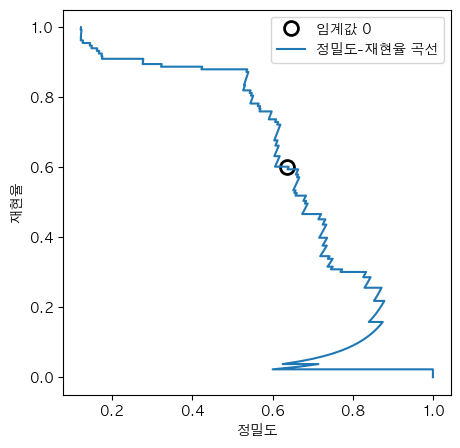

In [171]:
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="정밀도-재현율 곡선")
+

plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

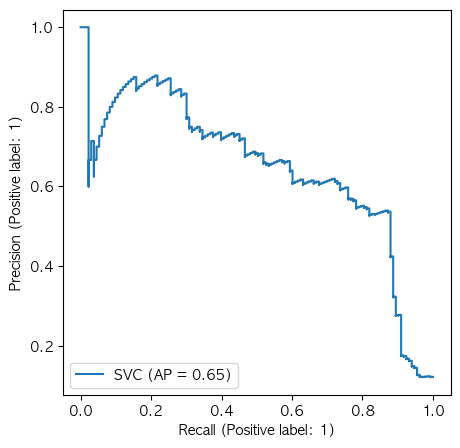

In [172]:
plot_precision_recall_curve(svc, X_test, y_test)

In [173]:
ap_svc = average_precision_score(y_test, svc.predict(X_test))
ap_gd = average_precision_score(y_test, ensenble_gd.predict(X_test))

# 평균 정밀도
print(ap_svc, ap_gd)


0.4290182599355531 0.43653801169590645


### ROC 곡선
- 분류기에 특성을 분석하는데 많이 사용되며, TPR(진짜 양성 비율 = 재현율)에 대한 FPR(거짓 음성 비율)을 나타낸다. 좌상단에 가까울수록 이상적인 분류기다
- 정밀도-재현율 곡선처럼 아래 면적값 하나로 ROC 곡선을 요약할 때가 많으며, 이 면적을 AUC라고 한다
- 데이터에서 클래스가 아무리 불균형하더라도 무작위로 예측한 AUC값은 0.5가 되며 그래서, **불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표**다
$$ FPR = \frac{FP}{FP + TN} $$

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

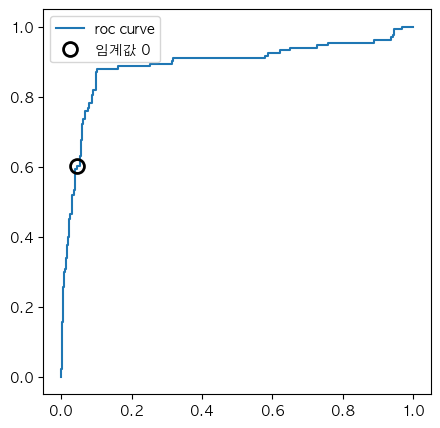

In [175]:
plt.plot(fpr, tpr, label='roc curve')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label= "임계값 0", fillstyle="none", c='k', mew=2)
plt.legend()

In [176]:
gd_auc = roc_auc_score(y_test, ensenble_gd.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

In [177]:
gd_auc, svc_auc

(0.948478807906864, 0.8908031166626244)

## 다중 분류의 평가 지표
- 기본적으로 다중 분류 지표는 이진 분류 평가 지표에서 유도 되었으며, 다만 모든 클래스에 대해 평균을 낸 것이다
- 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1 점수의 다중 분류 버전
(한 클래스를 양성 클래스로 두고 나머지 클래스를 음성 클래스로 간주하여 클래스마다 f1 점수 계산 그리고, 클래스별 f1점수를 다음 전략 중 하나를 사용하여 평균낸다)
1. macro : 평균은 클래스별 f1 점수에 가중치를 주지 않는다. 클래스 크기에 상관 없이 모든 클래스 같은 비중
2. weighted : 평균은 클래스별 샘플 수로 가중치를 두어 f1 점수의 평균을 계산
3. micro : 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1점수를 이 수치로 계산

> 각 샘플을 똑같이 간주한다면 micro 평균 f1 점수를 추천, 각 클래스를 동일한 비중으로 고려한다면 macro평균 f1추천

In [178]:
digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print(lr.score(X_test, y_test))
confusion_matrix(y_test, pred)


0.9533333333333334


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]])

In [179]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [180]:
from sklearn.metrics import f1_score

In [181]:
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='macro')) # 클래스 크기에 관계 없이 모두 같은 비중

0.9533333333333334
0.9539995483362096


--- 
# 기타
---

## % 와 %% 의 차이
- % 는 line command로 하나의 라인에 대해서 적용된다.
- %% 는 cell command로 해당 Cell에 작성된 모든 코드에 적용된다

```%%timeit```

# Column 관련

In [182]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf =data.select_dtypes(include=numerics)

# Column Transformer 관련

In [183]:
cars = pd.read_csv('./data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [184]:
obj_col_list = list()
num_col_list = list()
for i in cars.columns:
    if(cars[i].dtype == 'O'):
        obj_col_list.append(i)
    else:
        num_col_list.append(i)
        

In [185]:
ct = ColumnTransformer(
[
    ("lb", OrdinalEncoder(), obj_col_list),
    ("sd", StandardScaler(), num_col_list)
])

In [186]:
ct.fit(cars)
cars_trans = ct.transform(cars)

In [187]:
get_feature_name = ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make', 'Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room', 'Weight']

In [188]:
ct.feature_names_in_

array(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Origin', 'Make'], dtype=object)

In [189]:
cars_trans_df = pd.DataFrame(cars_trans, columns=get_feature_name)

# Pipeline
- 여러 처리 단계를 하나의 scikit-learn 추정기 형태로 묶어주는 클래스
- 가장 일반적인 경우는 분류기 같은 지도 학습 모델과 (데이터 스케일 조정 같은)전처리 단계를 연결할 때
- 가장 큰 장점은 cross_val_score나 GridSearchCV에 파이프라인을 하나의 추정기처럼 사용할 수 있다는 것
- make_pipeline 명령어를 통해 생성하면, 단계 이름을 지정안해도 된다
- 모델의 매개변수와 함께 필요/불필요한 전처리 과정의 매개변수를 찾는 것은 매우 강력한 전략이다

In [190]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [191]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [192]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [193]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [194]:
X_test_scaled = scaler.transform(X_test)
svc.score(X_test_scaled, y_test)

0.972027972027972

In [195]:
cross_val_score(svc, X_train_scaled, y_train)

array([0.97674419, 0.97647059, 0.95294118, 1.        , 1.        ])

In [196]:
param = {'C' : [0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000], 
         'gamma' : [0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000] }
grid = GridSearchCV(SVC(), param_grid=param, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]})

In [197]:
grid.best_estimator_

SVC(C=10000, gamma=0.01)

In [198]:
grid.score(X_test_scaled, y_test)

0.9440559440559441

In [199]:
from sklearn.pipeline import Pipeline

In [200]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [201]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

## 그리드 서치에 적용
- 매개변수가 파이프라인의 어떤 단계에 속한 것인지 알려줘야 하며, 단계 이름과 매개변수 이름을 "__" (밑줄 2개)로 연결해서 만든다 
- (ex. pipe에서의 단계이름 svm과 매개변수 C라면 svm__C)
- Cross_validate에서 매번 훈련데이터에 대해 전처리가 수행되기 때문에 정보 누설이 발생 되지 않는다. 
* GridSearch와 pipe조합 많이 사용

In [202]:
param = {
    "svm__C" : [0.001, 0.01, 0.1, 1, 10, 100],
    "svm__gamma" : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [203]:
gs = GridSearchCV(pipe, param_grid=param, cv=5)

In [204]:
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.972027972027972

In [205]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=1, gamma=1))])

In [206]:
components = pipe.named_steps['svm'].C #named_steps를 통해 단계 속성 접근
components 

1.0

In [207]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [208]:
param_grid = [
    {'classifier' : [SVC()], 'preprocessing': [StandardScaler()],
    'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier' : [RandomForestClassifier(n_estimators=100)],
     'preprocessing' : [None], 'classifier__max_features' : [1,2,3]
    }
]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [210]:
grid.best_estimator_

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', SVC(C=10, gamma=0.01))])

# ADP, 해커톤 답 제출
1. id & 결과 제출 때, 학습할때는 데이터 분할 및 shuffle등도 들어가서 id 값이 섞이고 없어지지만(학습 때 삭제 주로), test data는 그런작업 없이 predict를 걸기 때문에 괜춘


In [ ]:
import inspect

def my_function():
    pass

package_name = inspect.getmodule(my_function).__package__

print(package_name)

SOM Structrue
SOM 은 우선 Map size 를 설정해줍니다. (2차원으로 x=3, y=3 크기의 Map 이라고 가정합시다)
Map Size 를 설정해, 전혀 학습하지 않은 생 Map 을 Default Map 이라고 칭하겠습니다.
이제 이 Default Map 을 조금씩 수정해서(학습해서) 데이터 분포 형태에 Map 을 근사시키려고 합니다.
3*3 사이즈의 map 은 9개의 map point = Node 로 이루어졍있고, 각 Node 는 데이터의 차원수와 동일한 parameter 갯수를 가집니다.
사진에서는 3차원 X(x1,x2,x3) 데이터 이므로 Node_i(w_i1, w_i2, w_i3) 가 i=1~9 로 존재합니다.
이제 이 각각의 Node 들과 각 데이터 X 사이의 거리를 구합니다.
이들중 데이터와 가장 가까운 node 를 winning node 라고 마킹합니다.


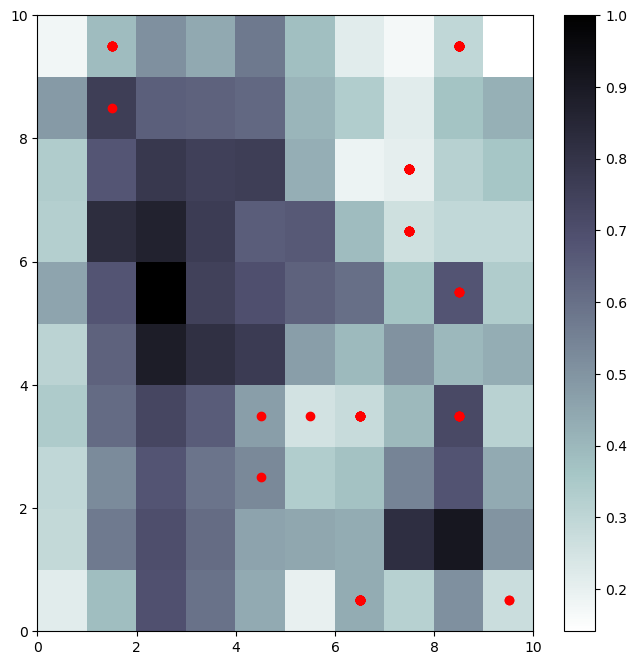

In [4]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate some sample data
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=42)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define the dimensions of the SOM grid
grid_size = (10, 10)  # 10x10 grid

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len=X.shape[1])

# Training the SOM
som.train_random(X, 100)  # 100 iterations

# Visualize the result
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar()

# Add data points to the map
for i, x in enumerate(X):
    w = som.winner(x)  # find the winner neuron
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ro')  # mark the winner neuron

plt.show()